In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **Contents**
---
## 0. [Library & Data Imports](#Library-&-Data-Imports)
---
## 1. [Introduction](#Introduction)
- 1.1 [Project Overview](#Project-Overview)
- 1.2 [Problem Statement](#Problem-Statement)
- 1.3 [Objective](#Objective)
---
## 2. [Understanding of Data](#Understanding-of-Data)
---
## 3. [Exploratory Data Analysis(EDA) & Data Visualisation](#Exploratory-Data-Analysis(EDA)-&-Data-Visualisation)

## 4. [Preprocessing](#Preprocessing)


## 5. [Feature Engineering](#Feature-Engineering)

## 6. [Models](#Models)

## 7. [Hyperparameter Tuning](#Hyperparameter-Tuning)

# **Library & Data Imports**

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score

#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# **Introduction**
---
## Project Overview
The objective of this competition is to predict the likelihood of a system being infected by different malware families based on its properties. The telemetry data, which includes these properties and infection records, is derived from threat reports gathered by the system's antivirus software.

---
## Problem Statement
This competition aims to predict a system's likelihood of malware infection based on its properties. Using telemetry data from antivirus threat reports, participants will develop models to enhance malware detection and prevention.

---
## Objective
The main Objective of this project is to build a machine learning model that can accurately predict whether a system will have a virus threat or not using provided features from the System Threat Forecaster Data.

# **Understanding of Data**
---
## Description of data
 The dataset contains the following files:
- **train.csv** - the training dataset
- **test.csv** - the test dataset
- **sample_submission.csv** - a sample submission file for predictions

---
- **Data Shape**



In [4]:
df.shape

(100000, 76)

---
- **Data Head**

In [5]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

---
- **Data Informtion**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

---
- **Number of Unique Values**

In [7]:
#UniqueValues = df.nunique().reset_index()
#UniqueValues.columns = ["Column", "UniqueValues"]
#UniqueValues

for col in df.columns:
    print(f"Column: {col}")
    unique_count = df[col].nunique()
    print(f"Number of Unique Values: {unique_count}")
    print(f"Percentage of Unique Values: {unique_count/df.shape[0]*100}")
    if unique_count < 100:
        print(f"Unique Values: {df[col].unique()}")
    else:
        print("Too many unique values to display.")
    print("-" * 70)

Column: MachineID
Number of Unique Values: 99835
Percentage of Unique Values: 99.835
Too many unique values to display.
----------------------------------------------------------------------
Column: ProductName
Number of Unique Values: 2
Percentage of Unique Values: 0.002
Unique Values: ['win8defender' 'mse']
----------------------------------------------------------------------
Column: EngineVersion
Number of Unique Values: 37
Percentage of Unique Values: 0.037
Unique Values: ['1.1.15200.1' '1.1.15100.1' '1.1.15000.2' '1.1.14800.3' '1.1.14901.4'
 '1.1.15300.6' '1.1.14700.5' '1.1.13504.0' '1.1.14104.0' '1.1.14306.0'
 '1.1.15300.5' '1.1.14600.4' '1.1.13701.0' '1.1.15000.1' '1.1.13202.0'
 '1.1.13303.0' '1.1.14500.5' '1.1.13601.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.14003.0' '1.1.14202.0' '1.1.14405.2' '1.1.13000.0' '1.1.13804.0'
 '1.1.14500.2' '1.1.14800.1' '1.1.14305.0' '1.1.14901.3' '1.1.13103.0'
 '1.1.13903.0' '1.1.12805.0' '1.1.14700.4' '1.1.12902.0' '1.1.14700.3'
 '1.1.13802.0' '1.1.1

---
- **Missing Values across training dataset**

In [8]:
missing_df = (df.isna().sum()/df.shape[0]*100).reset_index()
missing_df.columns = ["Column", "Percentage_Missing"]
missing_df


,Column,Percentage_Missing
0,MachineID,0.000
1,ProductName,0.000
2,EngineVersion,0.000
3,AppVersion,0.000
4,SignatureVersion,0.000
5,IsBetaUser,0.000
6,RealTimeProtectionState,0.066
7,IsPassiveModeEnabled,0.000
8,AntivirusConfigID,0.076
9,NumAntivirusProductsInstalled,0.076



## Initial Data Exploration
Through Initial exploration of the dataset, we derived the following key highlights such as categorical and numeric features, and missing values across the dataset:

1. **Categorical Features :** Features such as ProductName, EngineVersion, AppVersion, SignatureVersion, etc. are categorical and will require encoding for model training.

2. **Numeric Features :** Features such as AntivirusConfifID,

3. **Missing Values :** There are some missing values throughout columns, as 0.06% in 'RealTimeProtectonState', 0.07 in 'AntivirusConfigID', 'NumAntivirusInstalled' and 'NumAntivirusEnabled', 0.98 in SMode, etc.

4. **Boolean :** Features such as IsPassiveModeEnabled, HasTpm, IsSystemProtected, **SMode**, etc. are boolean.
---
[Back to top](#Contents)

#  **Exploratory Data Analysis(EDA) & Data Visualisation**

- **Columns**

In [9]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

## Numerical Columns

In [10]:
numerical_columns = []

for col in df.columns:
  if df[col].dtype in ['int', 'float'] and df[col].nunique()>100:
    numerical_columns.append(col)

print(f'Toatal count : {len(numerical_columns)}')
numerical_columns


Toatal count : 19


['AntivirusConfigID',
 'CountryID',
 'CityID',
 'GeoRegionID',
 'LocaleEnglishNameID',
 'IEVersionID',
 'OEMNameID',
 'OEMModelID',
 'ProcessorModelID',
 'PrimaryDiskCapacityMB',
 'SystemVolumeCapacityMB',
 'TotalPhysicalRAMMB',
 'PrimaryDisplayDiagonalInches',
 'PrimaryDisplayResolutionHorizontal',
 'PrimaryDisplayResolutionVertical',
 'InternalBatteryNumberOfCharges',
 'OSBuildRevisionOnly',
 'FirmwareManufacturerID',
 'FirmwareVersionID']

## Categorical Column

In [11]:
categorical_columns = []

for col in df.columns:
   if df[col].dtype not in ['int64', 'float64'] or df[col].nunique() <= 100:
            categorical_columns.append(col)


print(f'Toatal count : {len(categorical_columns)}')
categorical_columns



Toatal count : 57


['MachineID',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'SignatureVersion',
 'IsBetaUser',
 'RealTimeProtectionState',
 'IsPassiveModeEnabled',
 'NumAntivirusProductsInstalled',
 'NumAntivirusProductsEnabled',
 'HasTpm',
 'PlatformType',
 'Processor',
 'OSVersion',
 'OSBuildNumber',
 'OSProductSuite',
 'OsPlatformSubRelease',
 'OSBuildLab',
 'SKUEditionName',
 'IsSystemProtected',
 'AutoSampleSubmissionEnabled',
 'SMode',
 'FirewallEnabled',
 'EnableLUA',
 'MDC2FormFactor',
 'DeviceFamily',
 'ProcessorCoreCount',
 'ProcessorManufacturerID',
 'PrimaryDiskType',
 'HasOpticalDiskDrive',
 'ChassisType',
 'PowerPlatformRole',
 'NumericOSVersion',
 'OSArchitecture',
 'OSBranch',
 'OSBuildNumberOnly',
 'OSEdition',
 'OSSkuFriendlyName',
 'OSInstallType',
 'OSInstallLanguageID',
 'OSUILocaleID',
 'AutoUpdateOptionsName',
 'IsPortableOS',
 'OSGenuineState',
 'LicenseActivationChannel',
 'IsFlightsDisabled',
 'FlightRing',
 'IsSecureBootEnabled',
 'IsVirtualDevice',
 'IsTouchEnabled',
 '

[Back to top](#Contents)

## Distribution of Target Column

In [12]:
target_distr = (df['target'].value_counts()/df.shape[0]*100)
target_distr.reset_index()

,target,count
0,1,50.525
1,0,49.475


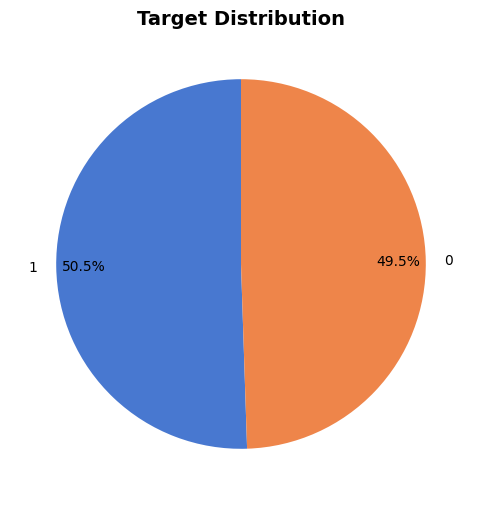

In [13]:
fig = plt.figure(figsize=(6, 6))


plt.pie(target_distr,
        labels=target_distr.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        labeldistance=1.1,
        colors=sns.color_palette("muted")
        )

plt.title('Target Distribution', fontsize=14, fontweight='bold')

plt.show()


**Understanding Target Distribution :**

- **Balanced Target -** The target variable is almost equally distributed (50.5% vs. 49.5%), meaning there is no strong class imbalance.

## ProductName

In [14]:
df['ProductName'].value_counts().reset_index()


,ProductName,count
0,win8defender,99771
1,mse,229


- **Pie chart for 'ProductName'**

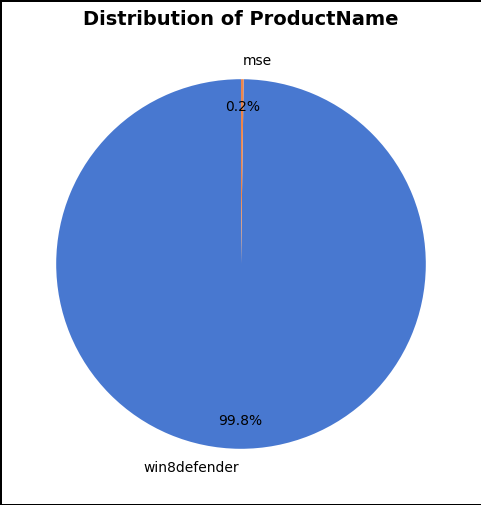

In [15]:
product_counts = df['ProductName'].value_counts()

fig = plt.figure(figsize=(6, 6))

fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('black')


plt.pie(product_counts,
        labels=product_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        labeldistance=1.1,
        colors=sns.color_palette("muted")
        )

plt.title('Distribution of ProductName', fontsize=14, fontweight='bold')

plt.show()


- **Majority of the devices contains `win8defender`.**

---

## PlatformType

In [16]:
df['PlatformType'].value_counts().reset_index()

,PlatformType,count
0,windows10,98344
1,windows8,1401
2,windows7,226
3,windows2016,29


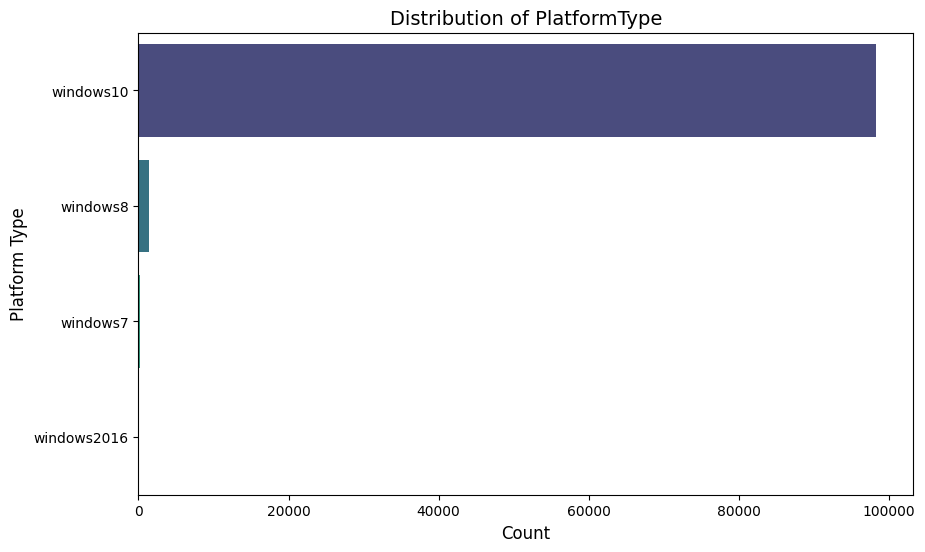

In [17]:
platform_counts = df['PlatformType'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette="viridis")

plt.xlabel("Count", fontsize=12)
plt.ylabel("Platform Type", fontsize=12)
plt.title("Distribution of PlatformType", fontsize=14)
plt.show()


## Correlation Insights & Heatmaps

In [18]:
from sklearn.preprocessing import LabelEncoder

features = df[['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture',
       'OSBranch', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
       'OSGenuineState', 'LicenseActivationChannel', 'IsFlightsDisabled',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier', 'DateAS', 'DateOS', 'target']]

le = LabelEncoder()
for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = le.fit_transform(features[col])

corr = features.corr()
corr['target'].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


target                                1.000000
AntivirusConfigID                     0.118304
TotalPhysicalRAMMB                    0.065747
IsSystemProtected                     0.062401
IsGamer                               0.061191
ProcessorCoreCount                    0.056769
EngineVersion                         0.055361
PrimaryDiskCapacityMB                 0.049117
RealTimeProtectionState               0.049012
SignatureVersion                      0.048941
DateAS                                0.047002
DateOS                                0.042607
NumericOSVersion                      0.041087
OSBuildNumberOnly                     0.038544
PrimaryDisplayDiagonalInches          0.035064
OSBuildNumber                         0.034712
PrimaryDisplayResolutionHorizontal    0.030559
OSEdition                             0.029293
OSBuildLab                            0.028968
OSSkuFriendlyName                     0.028384
IEVersionID                           0.023820
HasOpticalDis

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


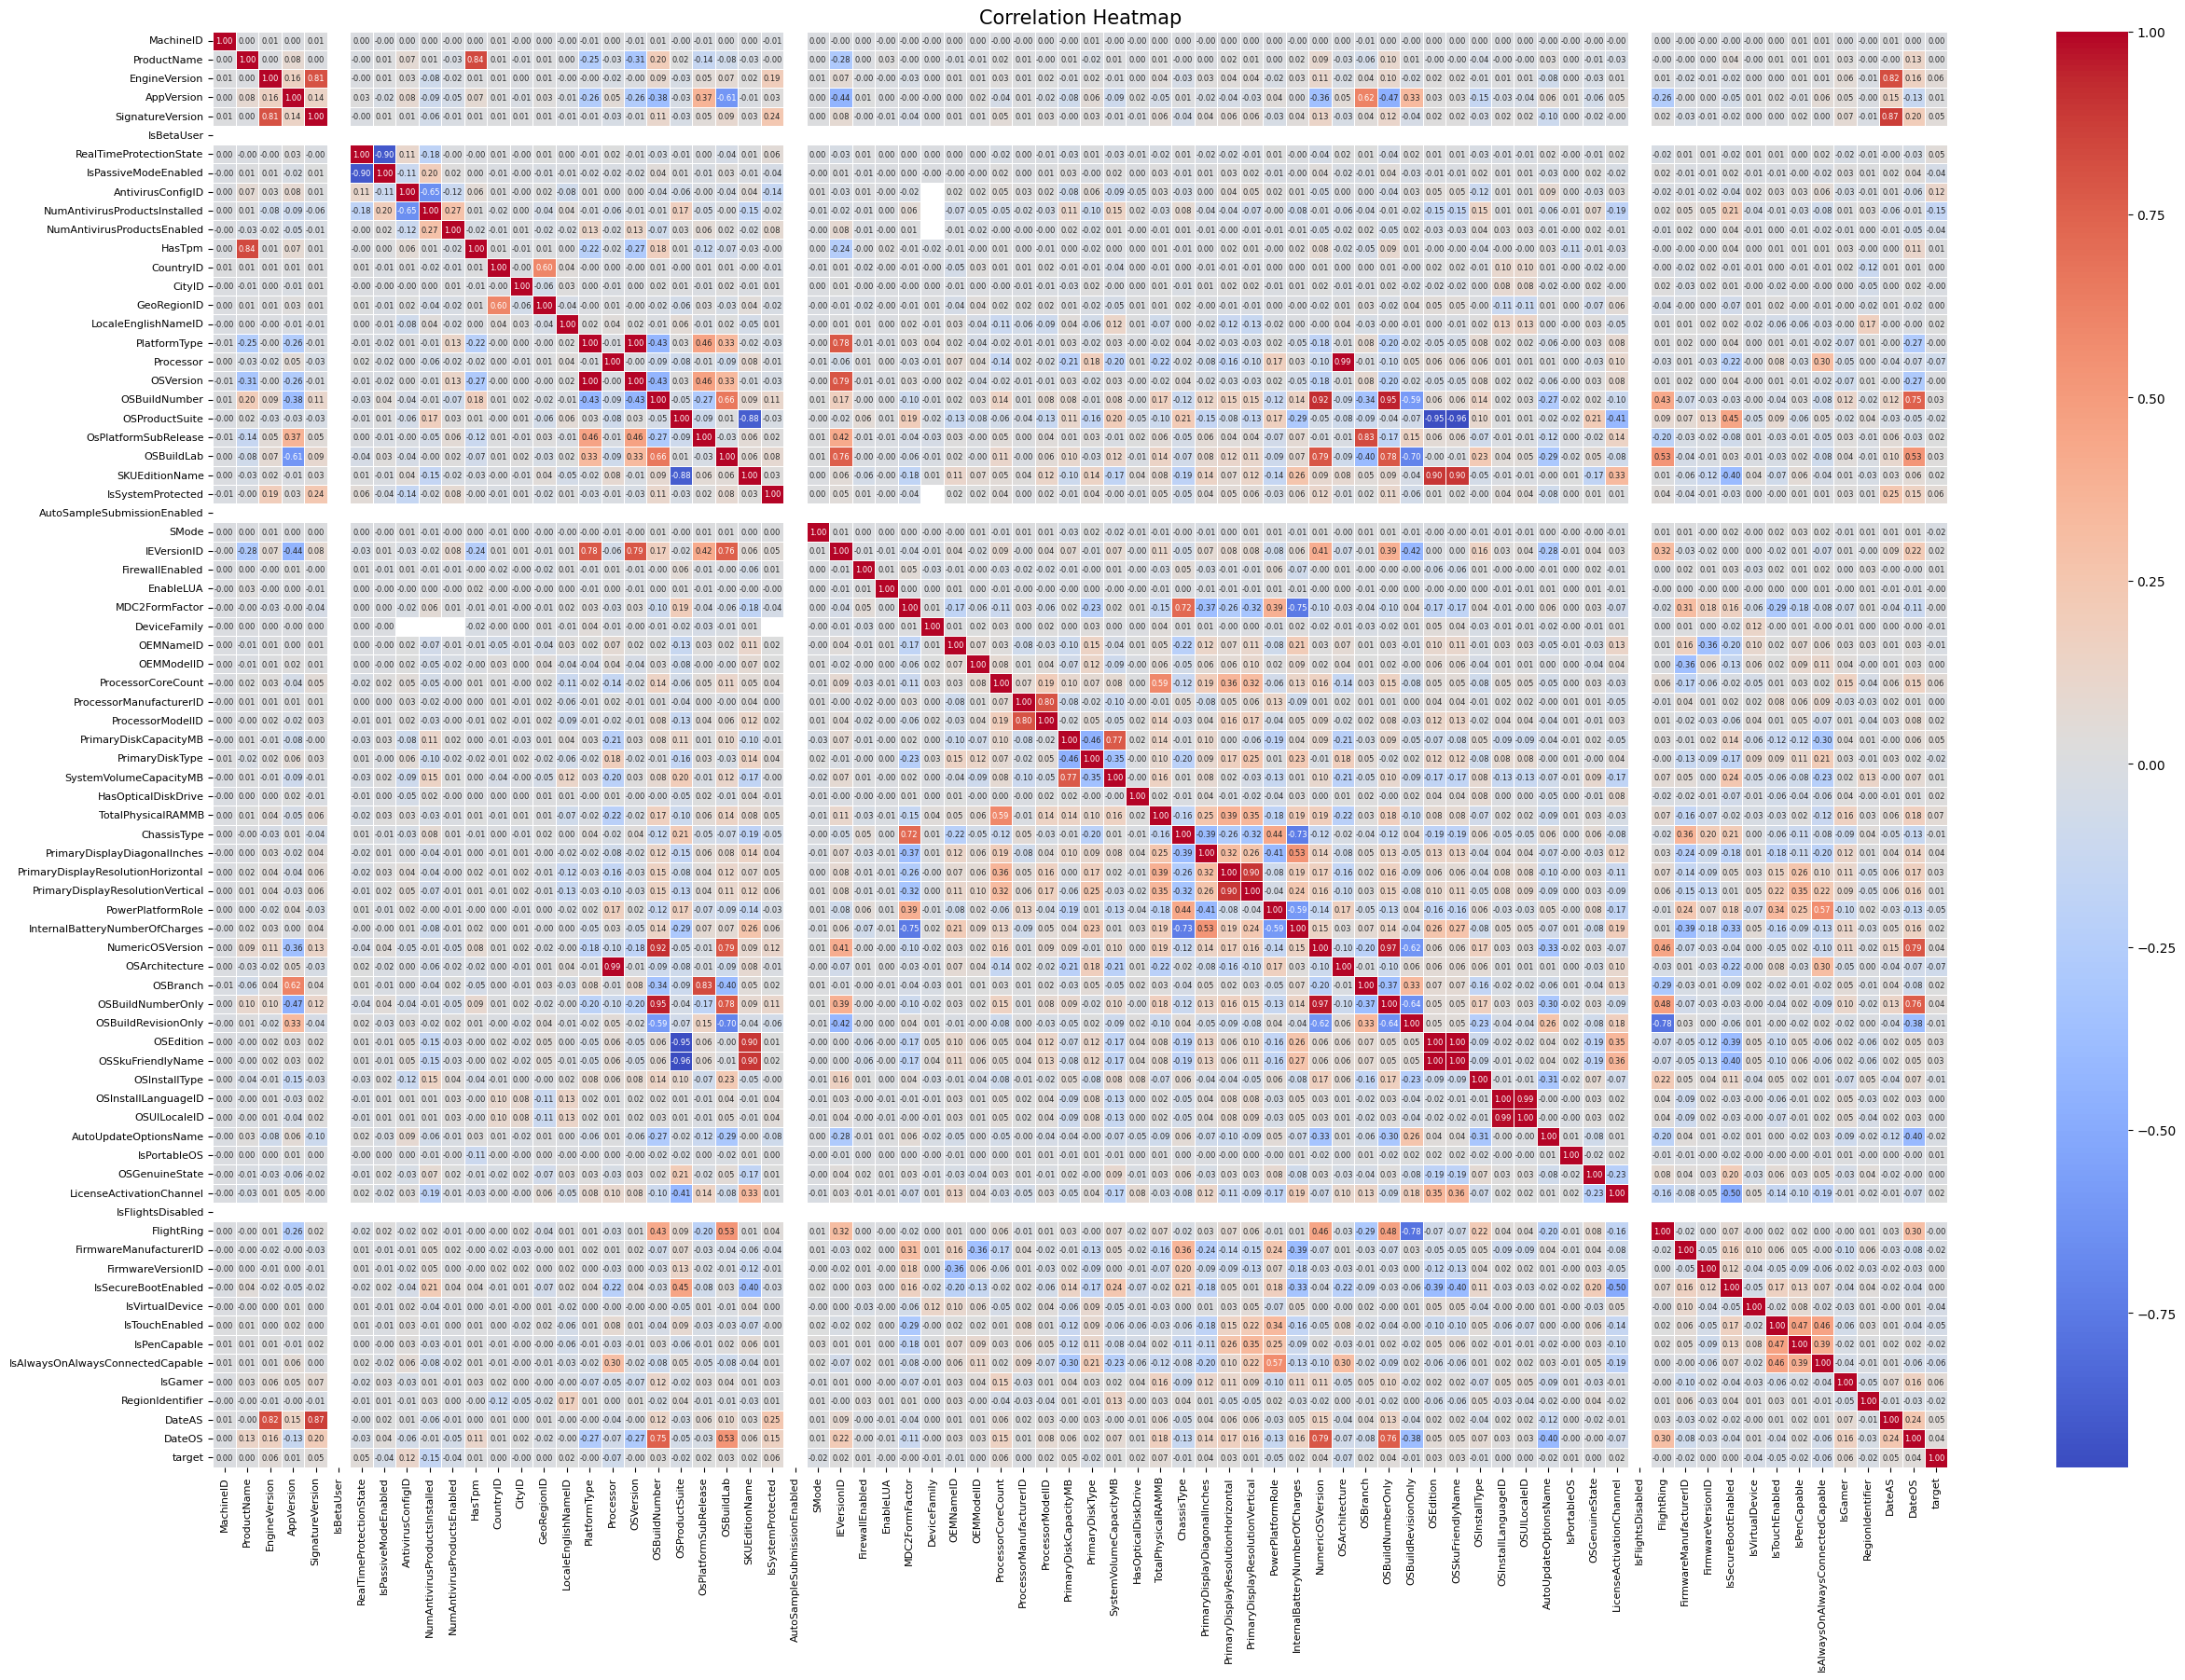

In [19]:
plt.figure(figsize=(30,20))  # Increase figure size
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=8)
plt.show()


## NumAntivirusProductsInstalled vs target

In [20]:

NumAnticount = df['NumAntivirusProductsInstalled'].value_counts().reset_index()
NumAnticount.columns = ['NumAntivirusProductsInstalled', 'Count']


target_dist = df.groupby('NumAntivirusProductsInstalled')['target'].value_counts(normalize=True).unstack().fillna(0)
target_dist.columns = ['Target_0_Proportion', 'Target_1_Proportion']


merged_table = NumAnticount.merge(target_dist, on='NumAntivirusProductsInstalled', how='left')

merged_table

,NumAntivirusProductsInstalled,Count,Target_0_Proportion,Target_1_Proportion
0,1.0,69748,0.445389,0.554611
1,2.0,27825,0.600683,0.399317
2,3.0,2255,0.699335,0.300665
3,4.0,91,0.703297,0.296703
4,5.0,5,0.800000,0.200000


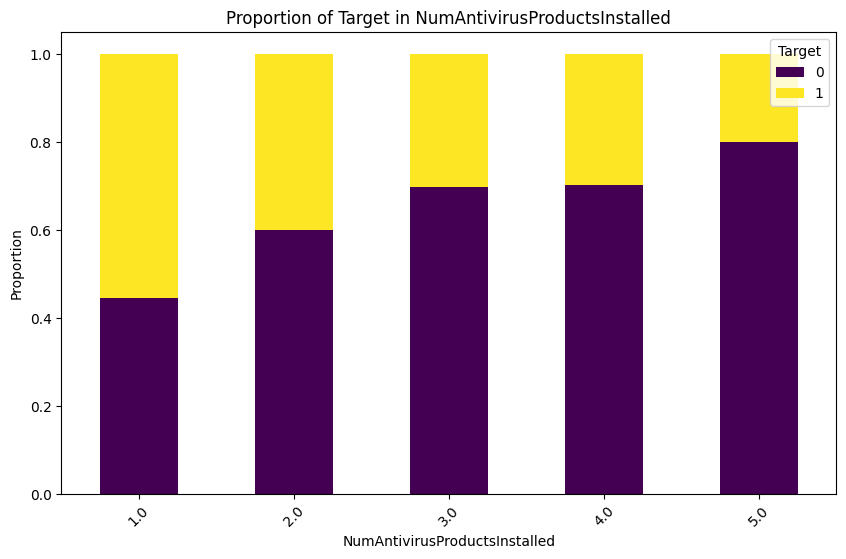

In [21]:
cross_tab = pd.crosstab(df['NumAntivirusProductsInstalled'], df['target'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.xlabel('NumAntivirusProductsInstalled')
plt.ylabel('Proportion')
plt.title('Proportion of Target in NumAntivirusProductsInstalled')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()


 **Key Observations :**
 - Higher infection rate with fewer antivirus products (more yellow at 1 Antivirus).
 - More antivirus products reduce infection risk (yellow proportion decreases as NumAntivirusProductsInstalled increases).
 - Trend stabilizes after 3+ antivirus products (less change in proportions).


## AntivirusConfigID

In [22]:
df['AntivirusConfigID'].describe()

count    99924.000000
mean     47975.710440
std      13803.321533
min         39.000000
25%      49480.000000
50%      53447.000000
75%      53447.000000
max      70490.000000
Name: AntivirusConfigID, dtype: float64

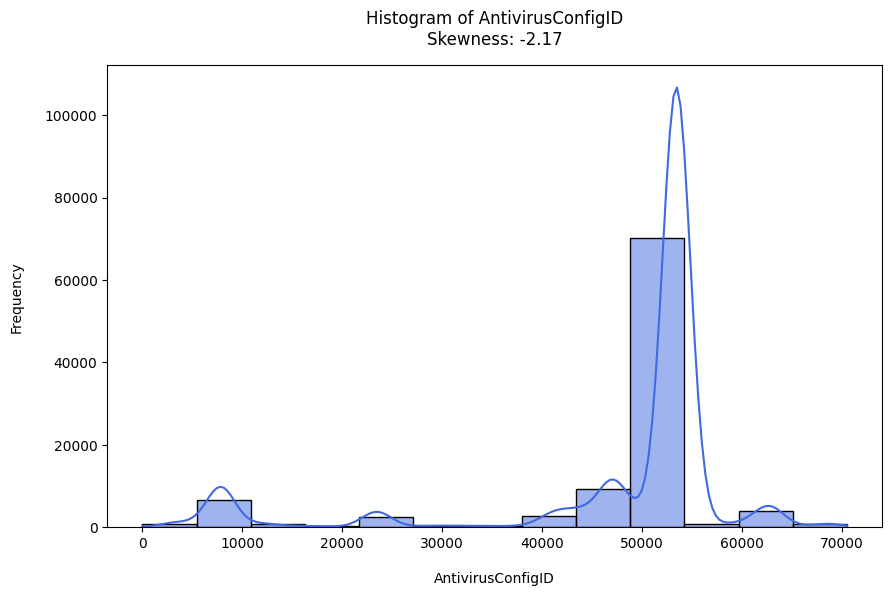

In [23]:
AntivirusConfigID_skewness = df['AntivirusConfigID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['AntivirusConfigID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('AntivirusConfigID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of AntivirusConfigID\nSkewness: {AntivirusConfigID_skewness:.2f}', pad=15)

plt.show()


- Highly Left-Skewed (-2.17 Skewness): Most data is concentrated around 50,000, with a long tail of smaller values.

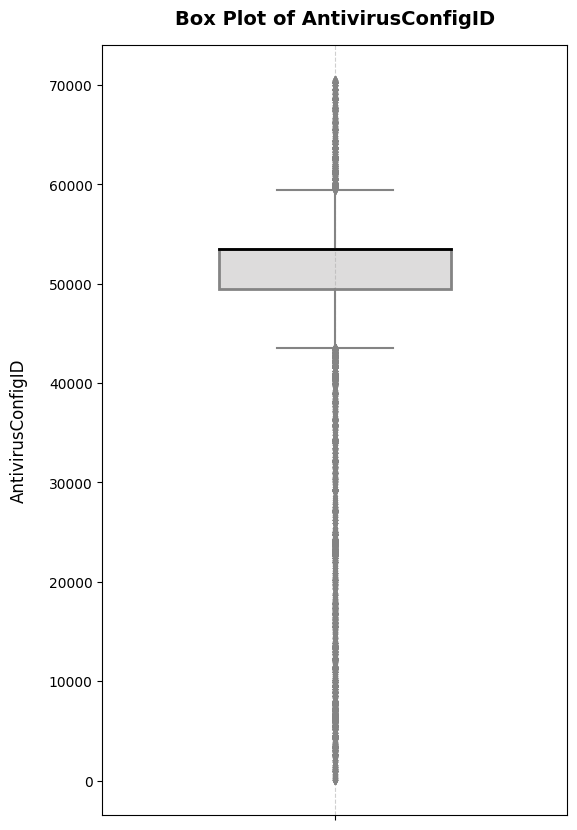

In [24]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['AntivirusConfigID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('AntivirusConfigID', labelpad=15, fontsize=12)
plt.title('Box Plot of AntivirusConfigID', pad=15, fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**Key Takeaways:**
- Most values are clustered in the upper range (around 50,000+).

- There are many smaller values (outliers) far below the main distribution.

- The dataset might be highly skewed and contain extreme low values.
---

## CountryID

In [25]:
df['CountryID'].describe()

count    100000.000000
mean        108.078790
std          63.062151
min           1.000000
25%          51.000000
50%          97.000000
75%         162.000000
max         222.000000
Name: CountryID, dtype: float64

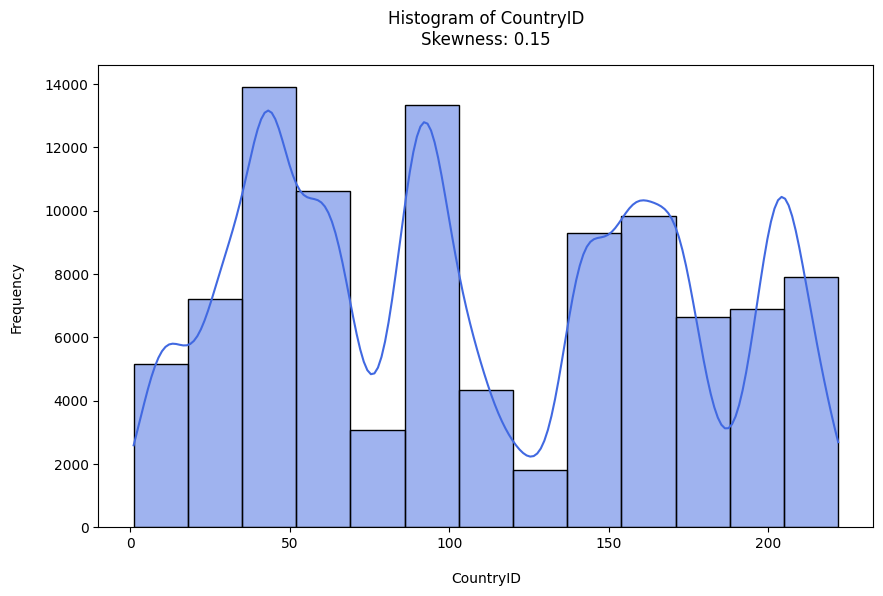

In [26]:
CountryID_skewness = df['CountryID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['CountryID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('CountryID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of CountryID\nSkewness: {CountryID_skewness:.2f}', pad=15)

plt.show()

- Moderately Symmetric (0.15 Skewness): The data is fairly balanced, with multiple peaks indicating distinct clusters of CountryID values.

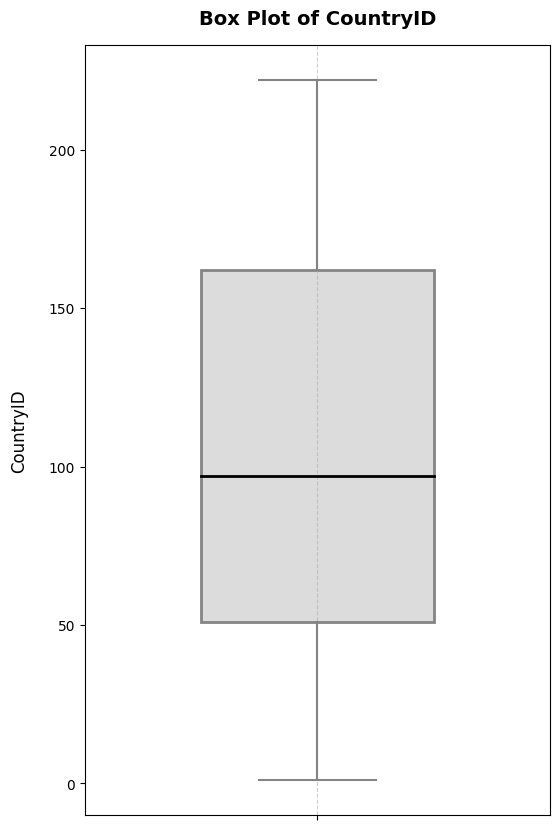

In [27]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['CountryID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('CountryID', labelpad=15, fontsize=12)
plt.title('Box Plot of CountryID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**Key Insights -**
- **Wide Spread:** CountryID values are spread across a large range.
- **Median:** The median is around 100, indicating a balanced distribution.
- **No Significant Outliers:** No extreme points beyond whiskers.
- **Interquartile Range (IQR):** Majority of values fall between ~50 and ~160.
---


## CityID

In [28]:
df['CityID'].describe()

count     99377.000000
mean      81029.938587
std       48944.027074
min           7.000000
25%       36694.000000
50%       82373.000000
75%      122835.000000
max      167957.000000
Name: CityID, dtype: float64

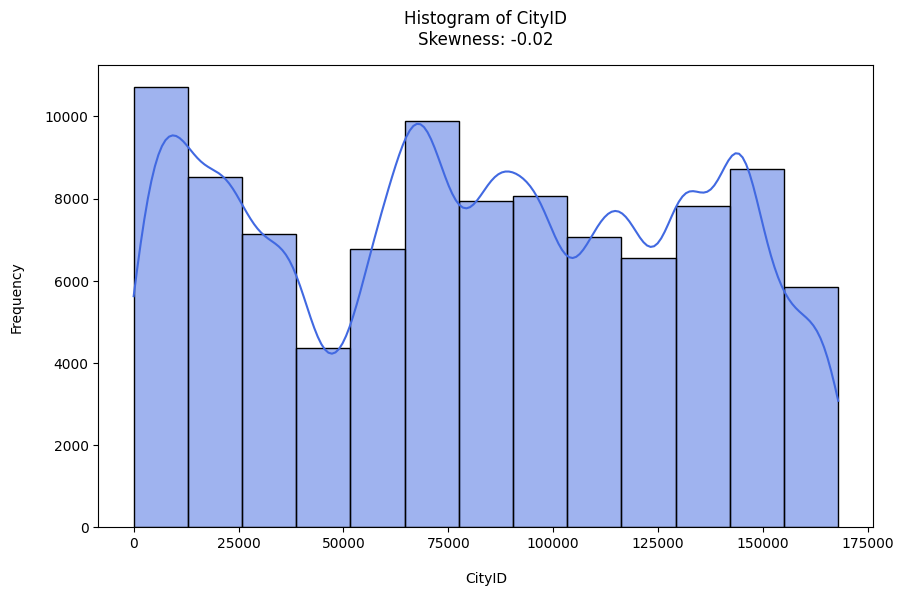

In [29]:
CityID_skewness = df['CityID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['CityID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('CityID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of CityID\nSkewness: {CityID_skewness:.2f}', pad=15)

plt.show()

- Near-Normal Distribution: Skewness = -0.02, indicating almost no skew.
- No Extreme Outliers: Unlike highly skewed distributions, this one doesn’t show a strong long tail.

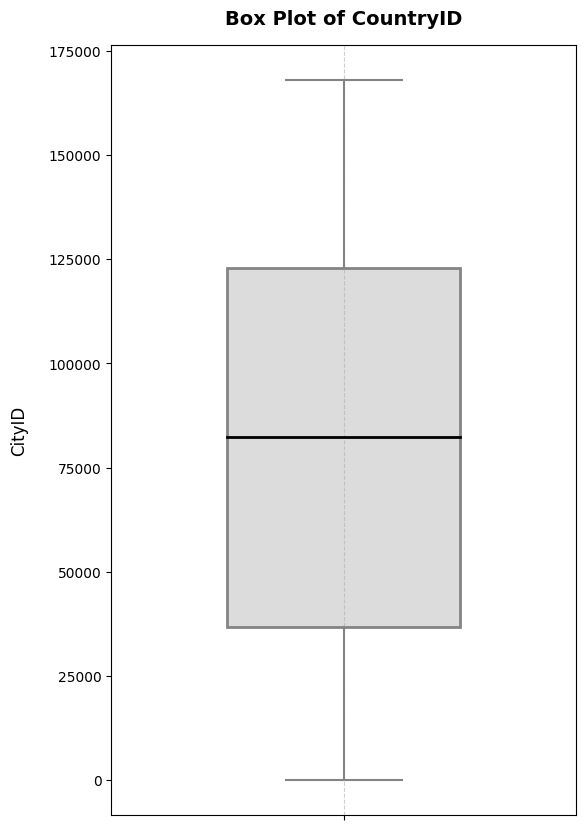

In [30]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['CityID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('CityID', labelpad=15, fontsize=12)
plt.title('Box Plot of CountryID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


- Symmetric Distribution: The median is nearly centered, indicating a balanced spread.
- Wide Interquartile Range (IQR): Suggests significant variability in the CityID values.
- Evenly Spread Data: Minimum and maximum values are well within the range, supporting a normal-like distribution.
---

## GeoRegionID

In [31]:
df['GeoRegionID'].describe()

count    100000.000000
mean        169.741630
std          89.188929
min           1.000000
25%          89.000000
50%         181.000000
75%         267.000000
max         296.000000
Name: GeoRegionID, dtype: float64

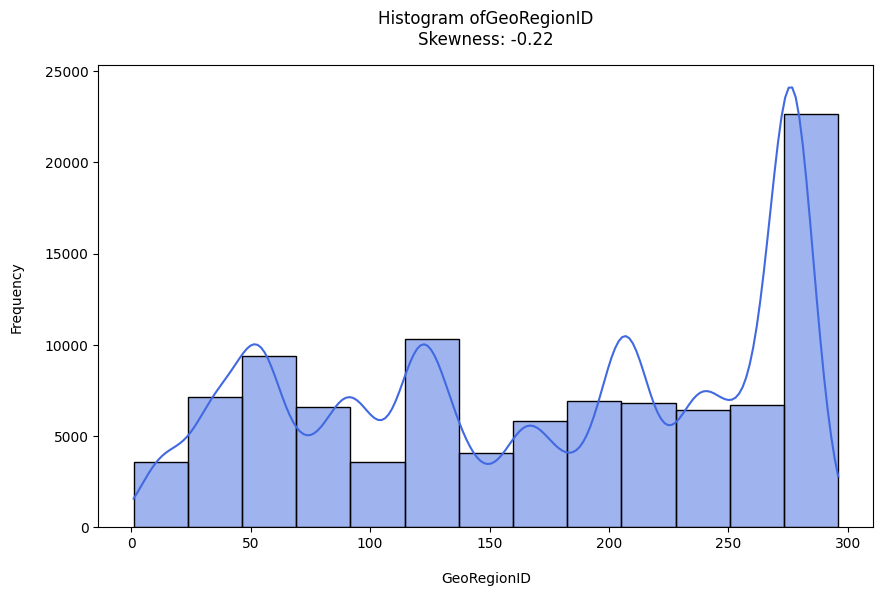

In [32]:
GeoRegionID_skewness = df['GeoRegionID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['GeoRegionID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('GeoRegionID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram ofGeoRegionID\nSkewness: {GeoRegionID_skewness:.2f}', pad=15)

plt.show()

- Slight Left-Skew (-0.22 Skewness): The distribution is nearly symmetric but slightly skewed to the left.
- High Frequency at Upper Range: The highest concentration of values is near 300.

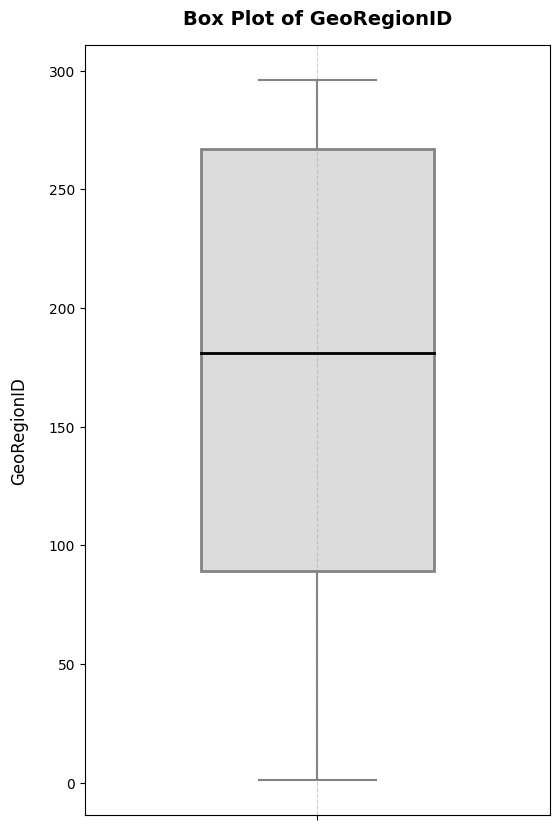

In [33]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['GeoRegionID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('GeoRegionID', labelpad=15, fontsize=12)
plt.title('Box Plot of GeoRegionID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Distribution: The median is nearly centered within the interquartile range (IQR), indicating a balanced spread of values.
- No Extreme Outliers: The whiskers extend to the minimum and maximum values without major outliers.
---

[Back to top](#Contents)

## LocaleEnglishNameID

In [34]:
df['LocaleEnglishNameID'].describe()

count    100000.000000
mean        122.695100
std          69.242252
min           1.000000
25%          74.000000
50%          88.000000
75%         182.000000
max         283.000000
Name: LocaleEnglishNameID, dtype: float64

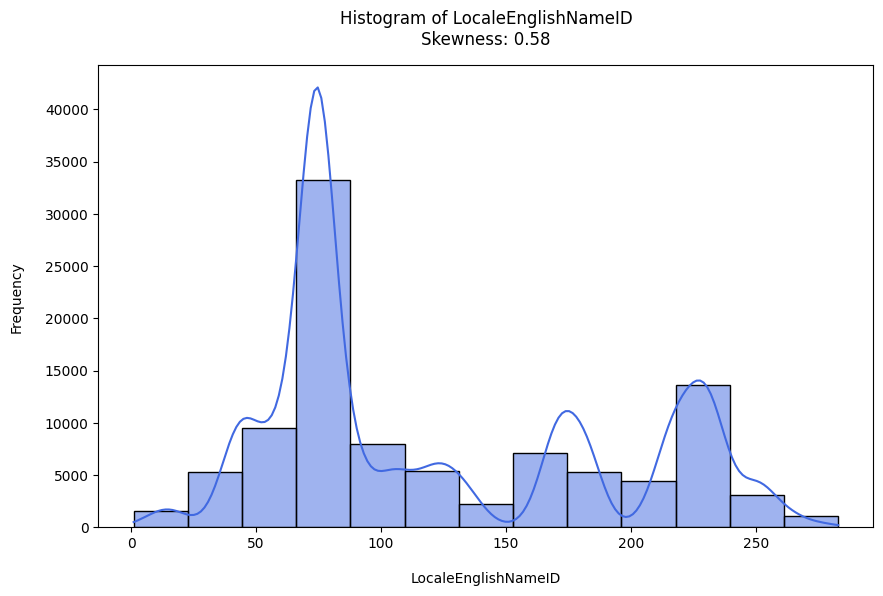

In [35]:
LocaleEnglishNameID_skewness = df['LocaleEnglishNameID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['LocaleEnglishNameID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('LocaleEnglishNameID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of LocaleEnglishNameID\nSkewness: {LocaleEnglishNameID_skewness:.2f}', pad=15)

plt.show()

- Right-Skewed Distribution: Skewness 0.58 suggests a moderate right skew, meaning a longer tail on the right side.
- High Concentration in One Range: A significant number of values are clustered between 50 and 100.

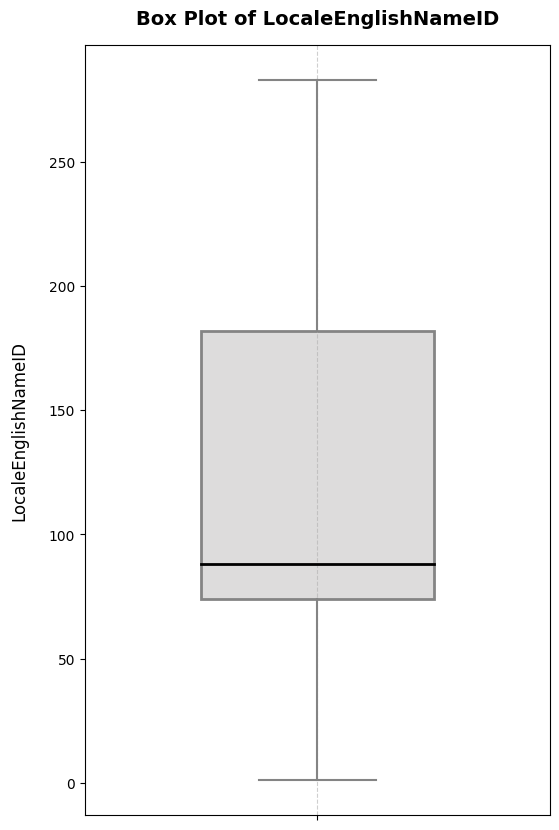

In [36]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['LocaleEnglishNameID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('LocaleEnglishNameID', labelpad=15, fontsize=12)
plt.title('Box Plot of LocaleEnglishNameID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Median (~90-100): The black horizontal line inside the box indicates the median value is relatively low compared to the maximum.
- Large IQR (Interquartile Range): The box covers a wide range, suggesting high variability in the middle 50% of the data.
---

## IEVersionID

In [37]:
df['IEVersionID'].describe()

count    99893.000000
mean       124.053848
std         33.535395
min         39.000000
25%        111.000000
50%        135.000000
75%        137.000000
max        429.000000
Name: IEVersionID, dtype: float64

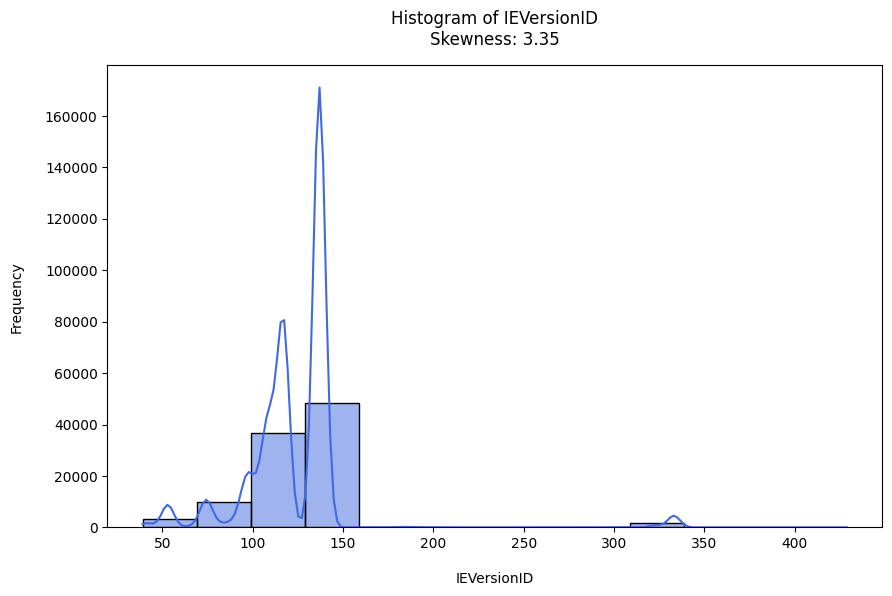

In [38]:
IEVersionID_skewness = df['IEVersionID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['IEVersionID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('IEVersionID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of IEVersionID\nSkewness: {IEVersionID_skewness:.2f}', pad=15)

plt.show()

**Data after Log transformation**

In [39]:
def log_transform(data):
    return np.log1p(data)

df['IEVersionID'] = (df['IEVersionID']).apply(log_transform)

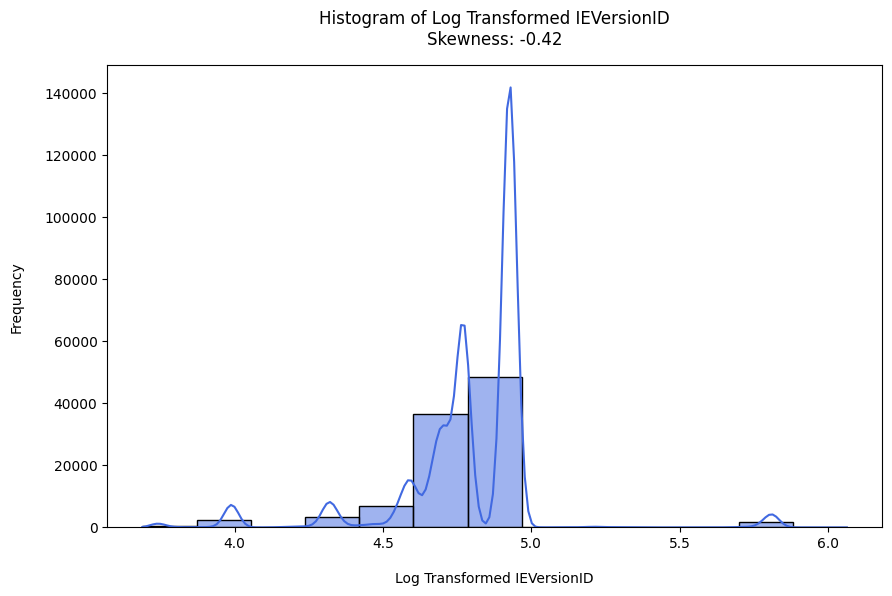

In [40]:
IEVersionID_skewness = df['IEVersionID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['IEVersionID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed IEVersionID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed IEVersionID\nSkewness: {IEVersionID_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: Skewness improved from 3.35 to -0.42, making the distribution more symmetric.
- Better Normalization: Data is now more concentrated in the middle range, reducing extreme values.

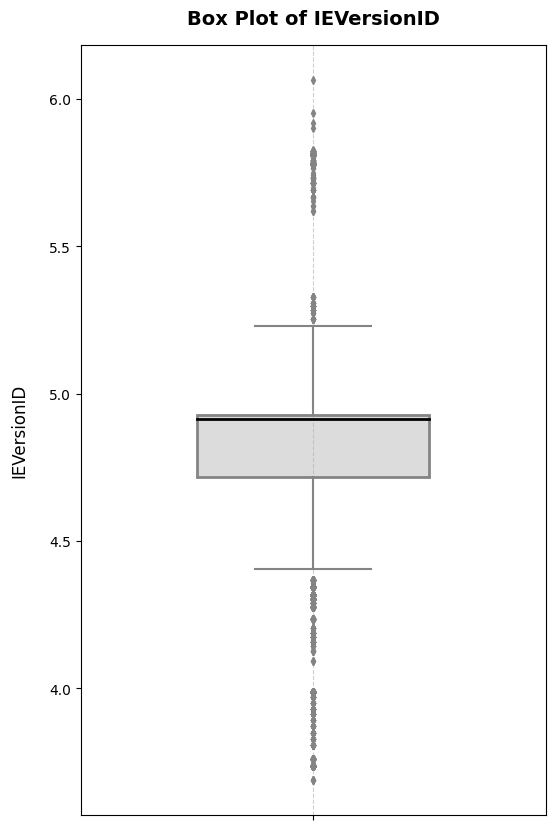

In [41]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['IEVersionID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('IEVersionID', labelpad=15, fontsize=12)
plt.title('Box Plot of IEVersionID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Presence of Outliers: Several outliers are visible above the upper whisker, confirming extreme values in the dataset.

---

## OEMNameID

In [42]:
df['OEMNameID'].describe()

count    99788.000000
mean      2209.573265
std       1300.863891
min         46.000000
25%       1443.000000
50%       2102.000000
75%       2668.000000
max       6062.000000
Name: OEMNameID, dtype: float64

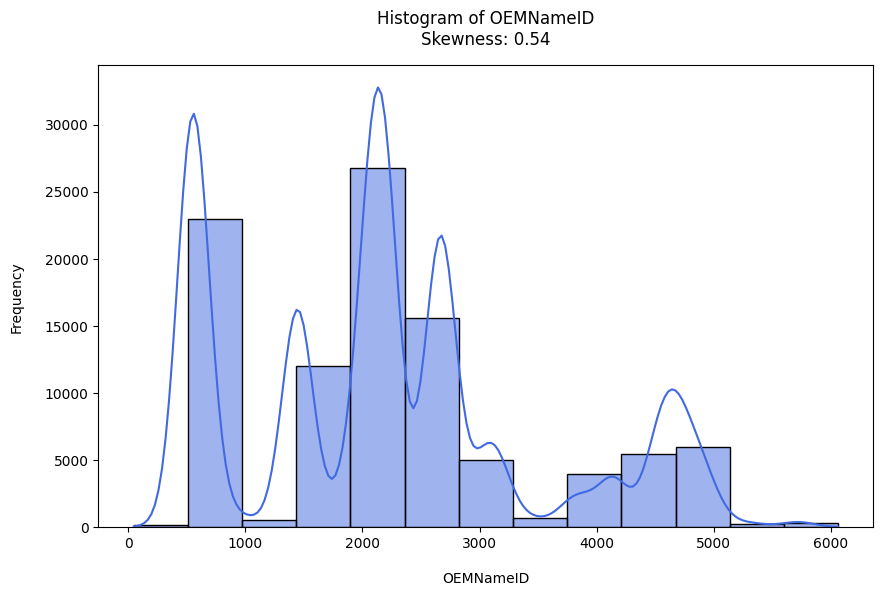

In [43]:
OEMNameID_skewness = df['OEMNameID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['OEMNameID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('OEMNameID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of OEMNameID\nSkewness: {OEMNameID_skewness:.2f}', pad=15)

plt.show()

- Moderately Right-Skewed: Skewness of 0.54 indicates a slight right skew with a longer tail on the higher end.
- Multimodal Distribution: Multiple peaks suggest distinct groups or clusters in the data.

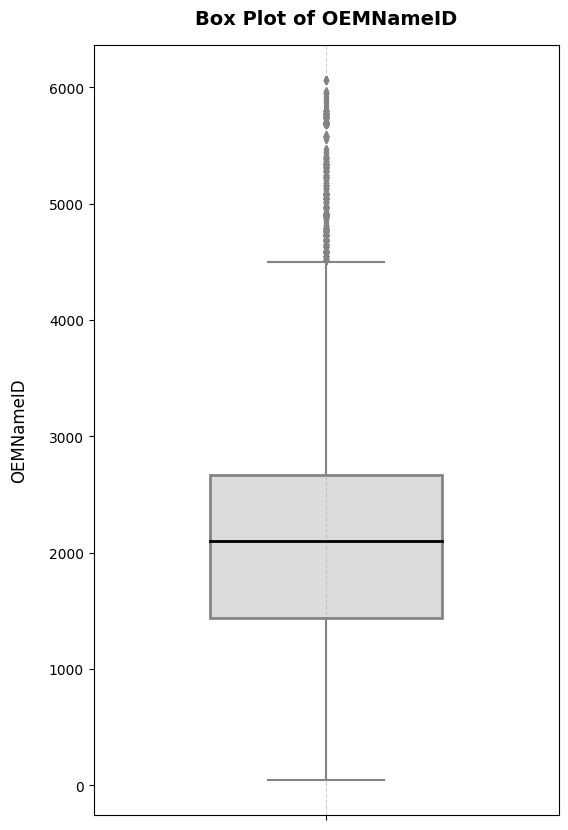

In [44]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['OEMNameID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('OEMNameID', labelpad=15, fontsize=12)
plt.title('Box Plot of OEMNameID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Presence of Outliers: Several data points above the upper whisker suggest extreme values.
- Wide Interquartile Range (IQR): The large box suggests high variability in the middle 50% of the data.
---

## OEMModelID

In [45]:
df['OEMModelID'].describe()

count     99772.000000
mean     238780.914154
std       71708.483379
min          22.000000
25%      189586.000000
50%      246528.000000
75%      302767.000000
max      345324.000000
Name: OEMModelID, dtype: float64

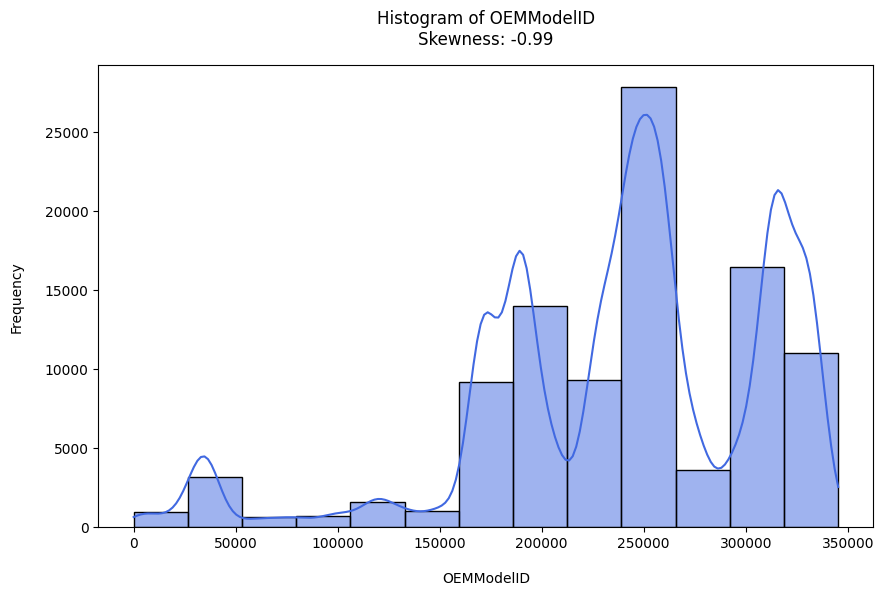

In [46]:
OEMModelID_skewness = df['OEMModelID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['OEMModelID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('OEMModelID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of OEMModelID\nSkewness: {OEMModelID_skewness:.2f}', pad=15)

plt.show()

- Left-Skewed Distribution: Skewness of -0.99 indicates a moderate left skew, with a longer tail on the lower end.
- High Frequency at Higher Values: Most data points are concentrated in the upper range.

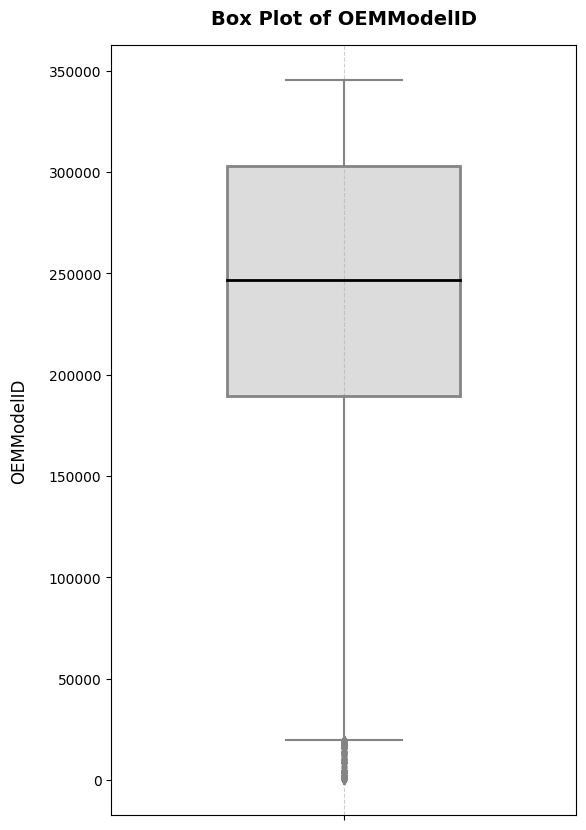

In [47]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['OEMModelID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('OEMModelID', labelpad=15, fontsize=12)
plt.title('Box Plot of OEMModelID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Lower-End Outliers Present: Several data points below the lower whisker suggest extreme low values.
- Median is Above the Center: The median is closer to the upper quartile, confirming the left skew.
---

## ProcessorModelID

In [48]:
df['ProcessorModelID'].describe()

count    99915.000000
mean      2367.693069
std        837.822392
min          3.000000
25%       1998.000000
50%       2503.000000
75%       2867.000000
max       4478.000000
Name: ProcessorModelID, dtype: float64

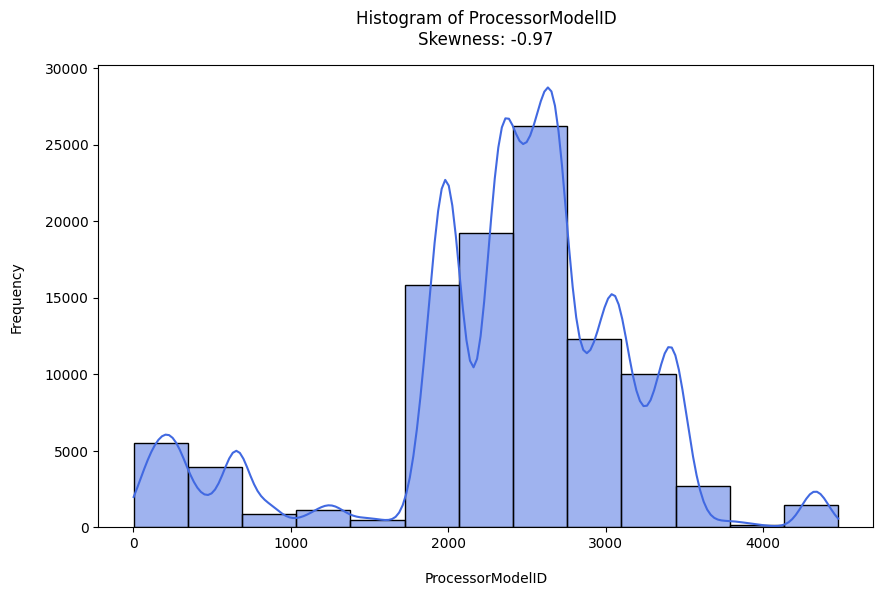

In [49]:
ProcessorModelID_skewness = df['ProcessorModelID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['ProcessorModelID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('ProcessorModelID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of ProcessorModelID\nSkewness: {ProcessorModelID_skewness:.2f}', pad=15)

plt.show()

- Negatively Skewed Distribution: The skewness of -0.97 suggests a moderate left skew, indicating more values are concentrated on the higher end, with a longer tail on the lower end.
- Multiple Peaks: The histogram exhibits multiple peaks, suggesting distinct clusters of processor models.

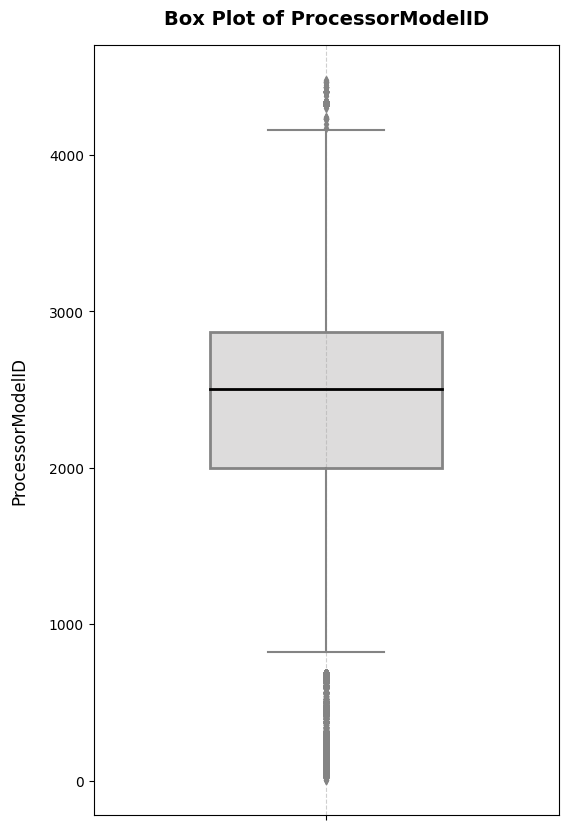

In [50]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['ProcessorModelID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('ProcessorModelID', labelpad=15, fontsize=12)
plt.title('Box Plot of ProcessorModelID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Median (~2000+): The central tendency of ProcessorModelID is around 2000, indicating most values cluster in this range.
- IQR Spread: A broad interquartile range suggests significant variation in processor models.
- Outliers: Several outliers on both ends, particularly high-end models, hinting at a diverse range of processor models in the dataset.
---

[Back to top](#Contents)

## PrimaryDiskCapacityMB

In [51]:
df['PrimaryDiskCapacityMB'].describe()

count    9.989000e+04
mean     5.158619e+05
std      3.525624e+05
min      1.228800e+04
25%      2.441980e+05
50%      4.769400e+05
75%      9.538690e+05
max      7.630885e+06
Name: PrimaryDiskCapacityMB, dtype: float64

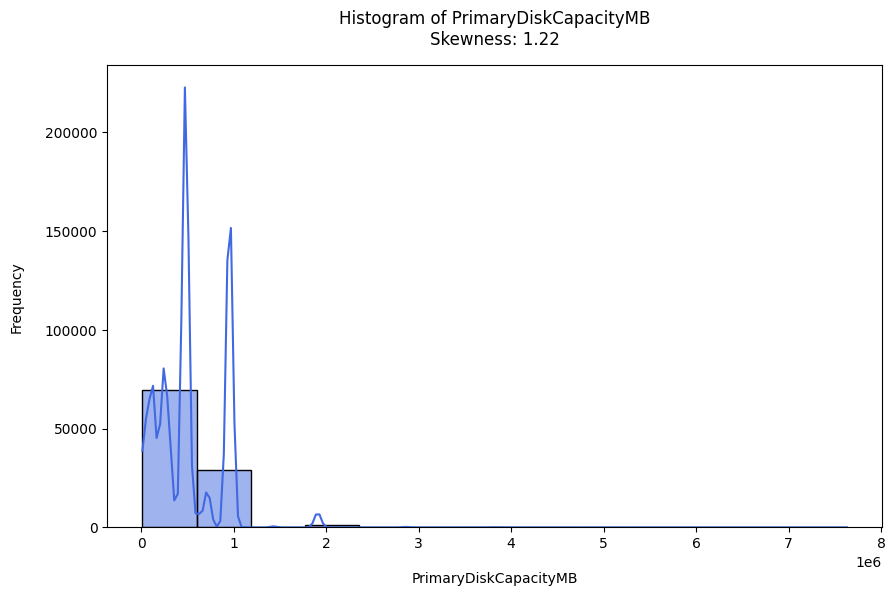

In [52]:
PrimaryDiskCapacityMB_skewness = df['PrimaryDiskCapacityMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDiskCapacityMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('PrimaryDiskCapacityMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of PrimaryDiskCapacityMB\nSkewness: {PrimaryDiskCapacityMB_skewness:.2f}', pad=15)

plt.show()

 **Data after Log Transformation**

In [53]:
def log_transform(data):
    return np.log1p(data)

df['PrimaryDiskCapacityMB'] = (df['PrimaryDiskCapacityMB']).apply(log_transform)

In [54]:
df['PrimaryDiskCapacityMB'].describe()

count    99890.000000
mean        12.832035
std          0.940197
min          9.416460
25%         12.405739
50%         13.075148
75%         13.768283
max         15.847715
Name: PrimaryDiskCapacityMB, dtype: float64

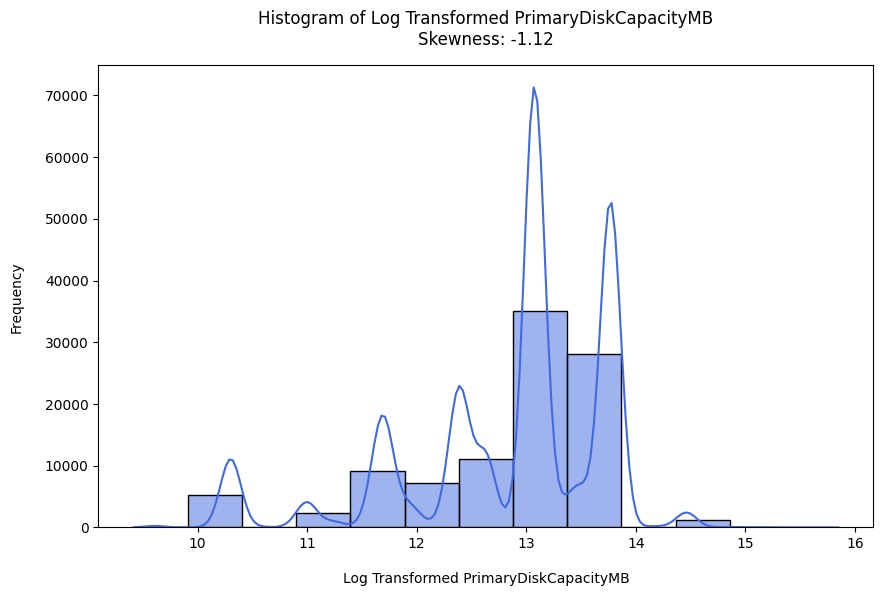

In [55]:
PrimaryDiskCapacityMB_skewness = df['PrimaryDiskCapacityMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDiskCapacityMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed PrimaryDiskCapacityMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed PrimaryDiskCapacityMB\nSkewness: {PrimaryDiskCapacityMB_skewness:.2f}', pad=15)

plt.show()

- The log transformation has helped reduce skewness but has not made the distribution perfectly normal.


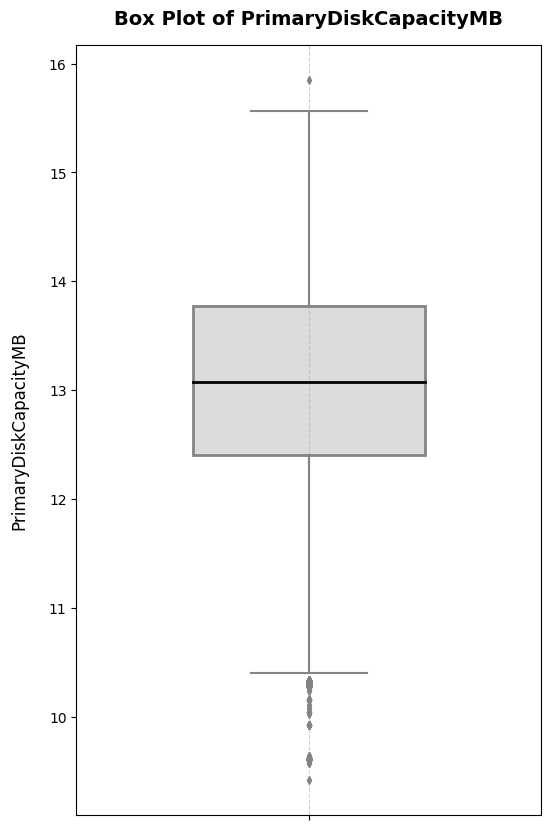

In [56]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['PrimaryDiskCapacityMB'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('PrimaryDiskCapacityMB', labelpad=15, fontsize=12)
plt.title('Box Plot of PrimaryDiskCapacityMB', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Interquartile Range (IQR): The box encloses the middle 50% of values, indicating variability.
- Outliers: Dots beyond whiskers represent extreme values or anomalies.
---

## SystemVolumeCapacityMB

In [57]:
df['SystemVolumeCapacityMB'].describe()

count    9.989000e+04
mean     3.819905e+05
std      3.246240e+05
min      1.088000e+04
25%      1.208410e+05
50%      2.567655e+05
75%      4.761020e+05
max      6.630319e+06
Name: SystemVolumeCapacityMB, dtype: float64

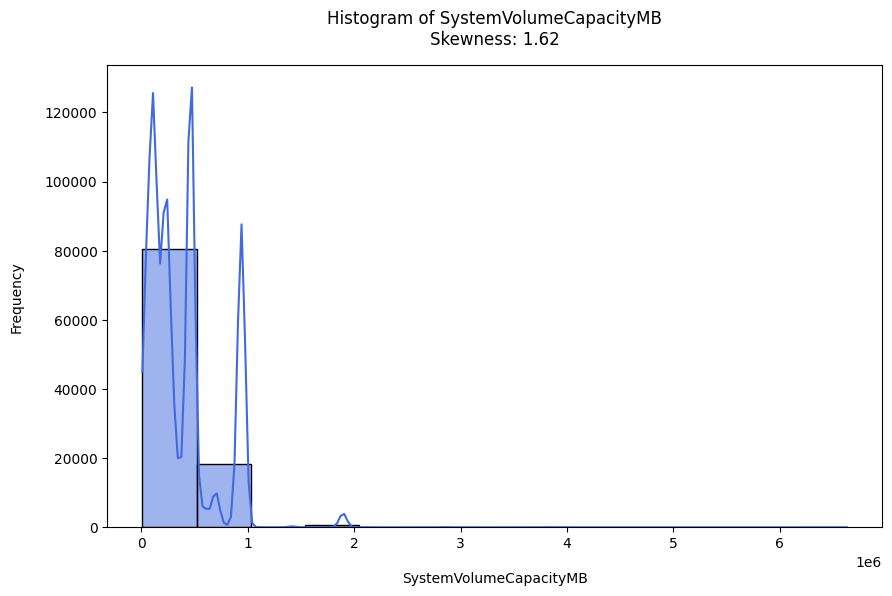

In [58]:
SystemVolumeCapacityMB_skewness = df['SystemVolumeCapacityMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['SystemVolumeCapacityMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('SystemVolumeCapacityMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of SystemVolumeCapacityMB\nSkewness: {SystemVolumeCapacityMB_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [59]:
df['SystemVolumeCapacityMB'] = (df['SystemVolumeCapacityMB']).apply(log_transform)

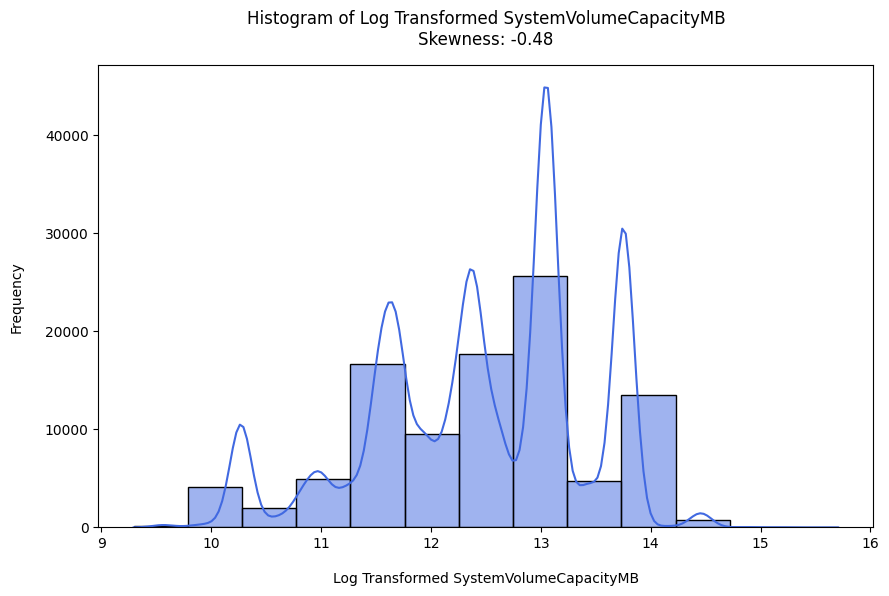

In [60]:
SystemVolumeCapacityMB_skewness = df['SystemVolumeCapacityMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['SystemVolumeCapacityMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed SystemVolumeCapacityMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed SystemVolumeCapacityMB\nSkewness: {SystemVolumeCapacityMB_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: From 1.62 to -0.48, making the distribution more symmetric.
- Stabilized Variance: Large values are compressed, improving scale consistency.


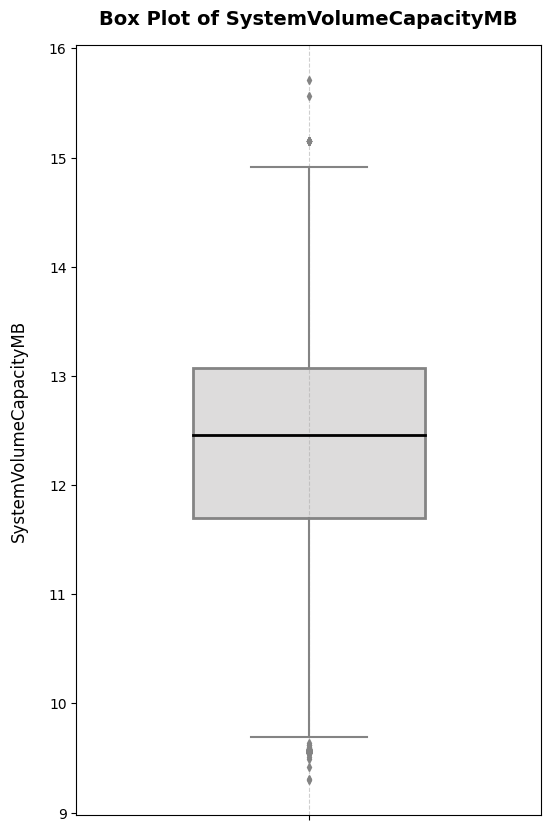

In [61]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['SystemVolumeCapacityMB'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('SystemVolumeCapacityMB', labelpad=15, fontsize=12)
plt.title('Box Plot of SystemVolumeCapacityMB', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Outliers: Small circles outside the whiskers highlight extreme values, suggesting some variability.
- Distribution: The data appears slightly skewed with high-end outliers, indicating some large variations in system volume capacity.
---

## TotalPhysicalRAMMB

In [62]:
df['TotalPhysicalRAMMB'].describe()

count     99849.000000
mean       6132.087442
std        4813.882548
min         512.000000
25%        4096.000000
50%        4096.000000
75%        8192.000000
max      262144.000000
Name: TotalPhysicalRAMMB, dtype: float64

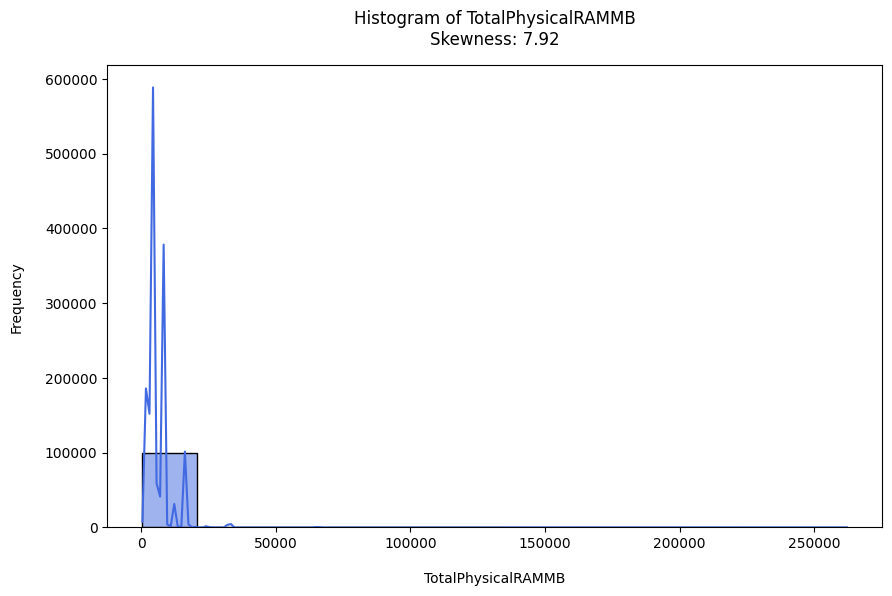

In [63]:
TotalPhysicalRAMMB_skewness = df['TotalPhysicalRAMMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPhysicalRAMMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('TotalPhysicalRAMMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of TotalPhysicalRAMMB\nSkewness: {TotalPhysicalRAMMB_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [64]:
df['TotalPhysicalRAMMB'] = (df['TotalPhysicalRAMMB']).apply(log_transform)

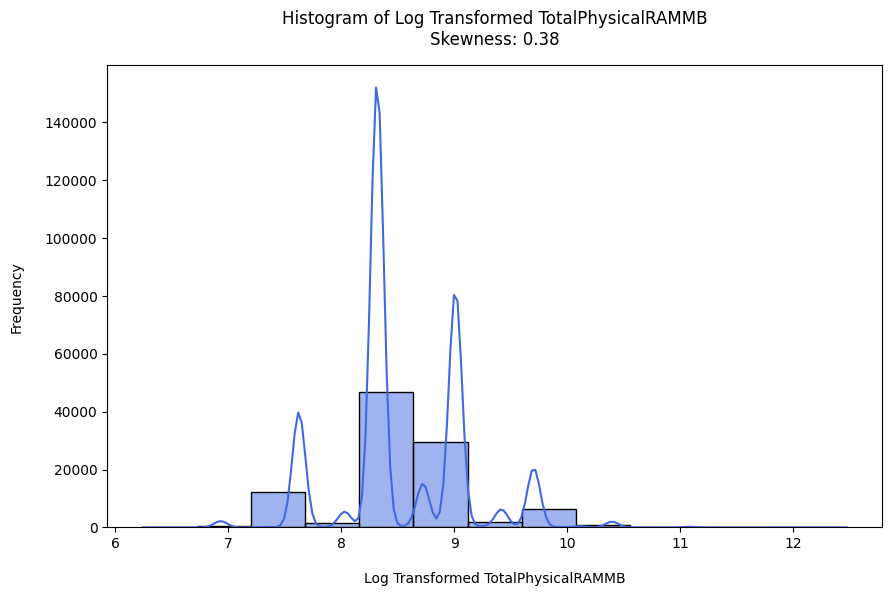

In [65]:
TotalPhysicalRAMMB_skewness = df['TotalPhysicalRAMMB'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPhysicalRAMMB'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed TotalPhysicalRAMMB', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed TotalPhysicalRAMMB\nSkewness: {TotalPhysicalRAMMB_skewness:.2f}', pad=15)

plt.show()

- Nearly Normal Distribution: Skewness = 0.38, indicating slight right skewness.
- Log Transformation Effective: Distribution is more symmetric compared to the original.

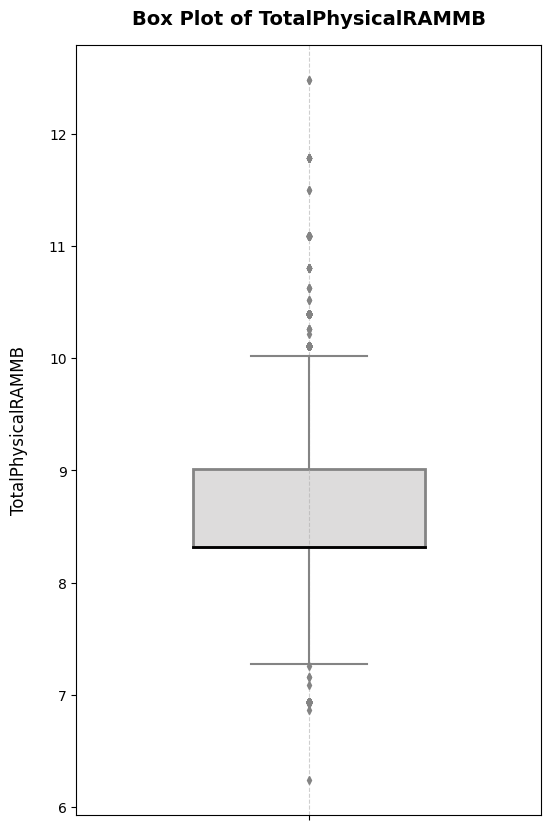

In [66]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['TotalPhysicalRAMMB'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('TotalPhysicalRAMMB', labelpad=15, fontsize=12)
plt.title('Box Plot of TotalPhysicalRAMMB', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Outliers Present: Several high-end values beyond 10, suggesting extreme cases.
- Moderate Spread: The interquartile range (IQR) is compact, showing moderate variability.
---


[Back to top](#Contents)

## PrimaryDisplayDiagonalInches

In [67]:
df['PrimaryDisplayDiagonalInches'].describe()

count    99928.000000
mean        16.708674
std          6.031598
min          5.300000
25%         13.900000
50%         15.500000
75%         17.200000
max        142.000000
Name: PrimaryDisplayDiagonalInches, dtype: float64

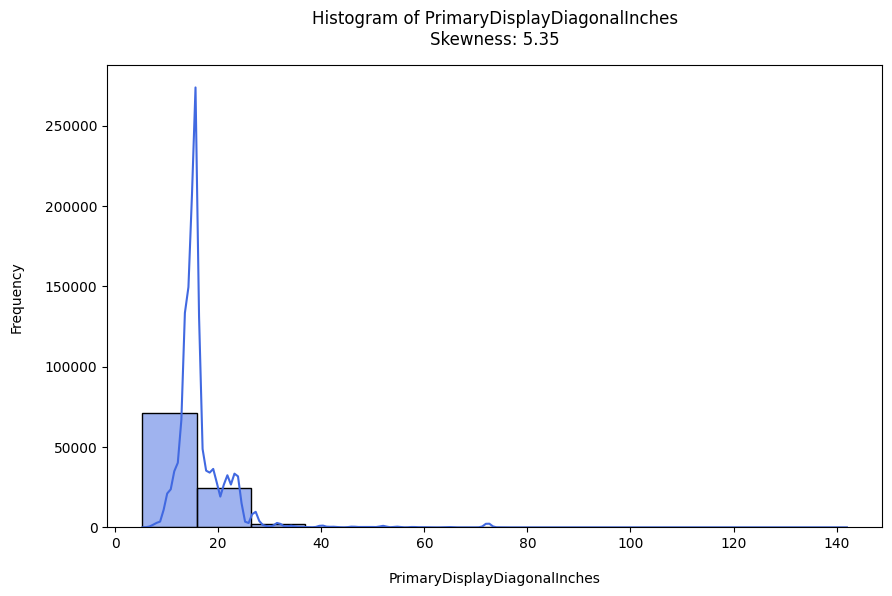

In [68]:
PrimaryDisplayDiagonalInches_skewness = df['PrimaryDisplayDiagonalInches'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayDiagonalInches'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('PrimaryDisplayDiagonalInches', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of PrimaryDisplayDiagonalInches\nSkewness: {PrimaryDisplayDiagonalInches_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [69]:
df['PrimaryDisplayDiagonalInches'] = df['PrimaryDisplayDiagonalInches'].apply(log_transform)

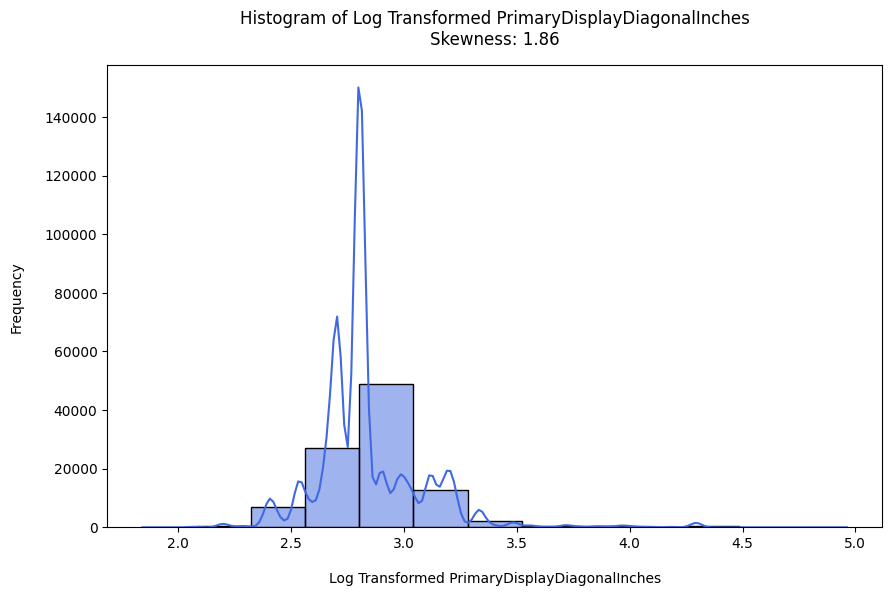

In [70]:
PrimaryDisplayDiagonalInches_skewness = df['PrimaryDisplayDiagonalInches'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayDiagonalInches'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed PrimaryDisplayDiagonalInches', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed PrimaryDisplayDiagonalInches\nSkewness: {PrimaryDisplayDiagonalInches_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: Skewness is 1.86, indicating a right-skewed distribution.
- Stabilized Variance: Compression of large values enhances scale consistency

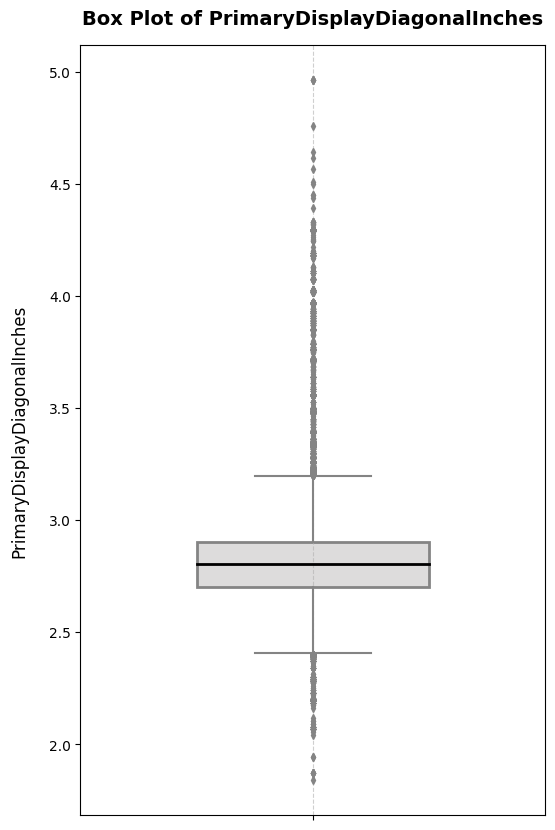

In [71]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['PrimaryDisplayDiagonalInches'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('PrimaryDisplayDiagonalInches', labelpad=15, fontsize=12)
plt.title('Box Plot of PrimaryDisplayDiagonalInches', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is around 2.8–3.0.
- Interquartile Range (IQR): The middle 50% of data is between approximately 2.6 and 3.1.
- Presence of Outliers: Several outliers are visible above and below the whiskers.
---

## PrimaryDisplayResolutionHorizontal

In [72]:
df['PrimaryDisplayResolutionHorizontal'].describe()

count    99928.000000
mean      1552.230416
std        363.438980
min        400.000000
25%       1366.000000
50%       1366.000000
75%       1920.000000
max       7680.000000
Name: PrimaryDisplayResolutionHorizontal, dtype: float64

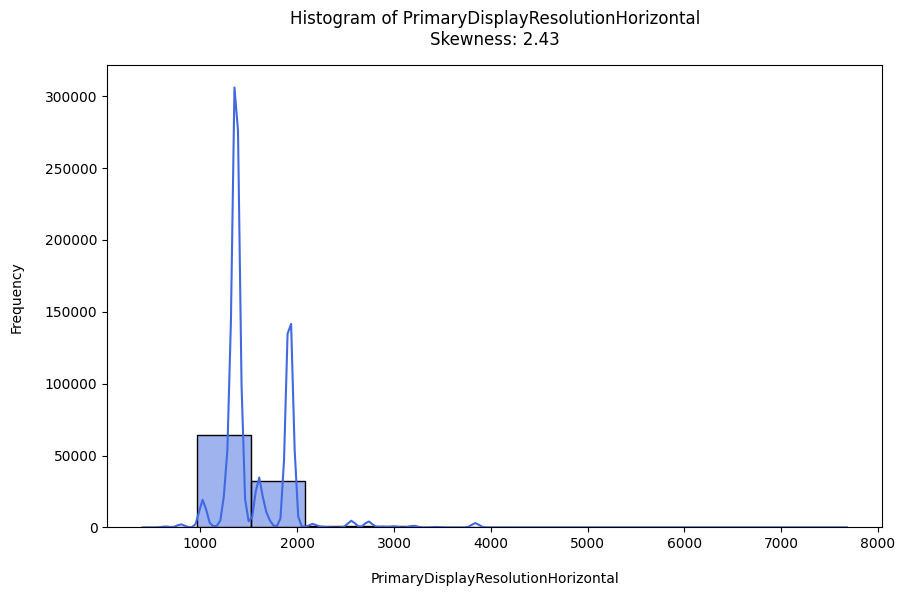

In [73]:
PrimaryDisplayResolutionHorizontal_skewness = df['PrimaryDisplayResolutionHorizontal'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayResolutionHorizontal'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('PrimaryDisplayResolutionHorizontal', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of PrimaryDisplayResolutionHorizontal\nSkewness: {PrimaryDisplayResolutionHorizontal_skewness:.2f}', pad=15)

plt.show()

**Daata after Log Transformation**

In [74]:
df['PrimaryDisplayResolutionHorizontal'] = df['PrimaryDisplayResolutionHorizontal'].apply(log_transform)

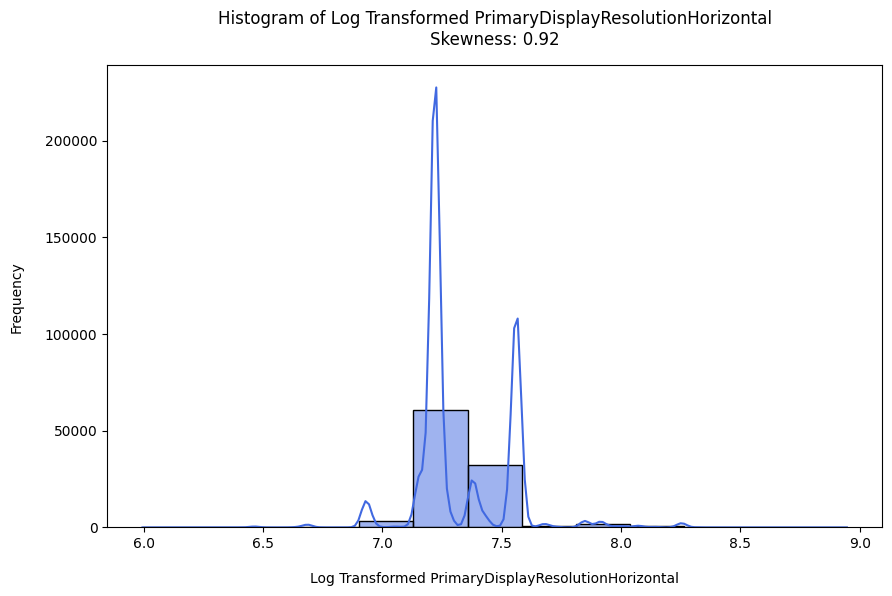

In [75]:
PrimaryDisplayResolutionHorizontal_skewness = df['PrimaryDisplayResolutionHorizontal'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayResolutionHorizontal'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed PrimaryDisplayResolutionHorizontal', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed PrimaryDisplayResolutionHorizontal\nSkewness: {PrimaryDisplayResolutionHorizontal_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: Skewness is 0.92, indicating mild right skewness.
- Improved Symmetry: Log transformation has helped normalize the distribution.
- Peak Concentration: Most values are centered around 7.0–7.5 on the log scale.

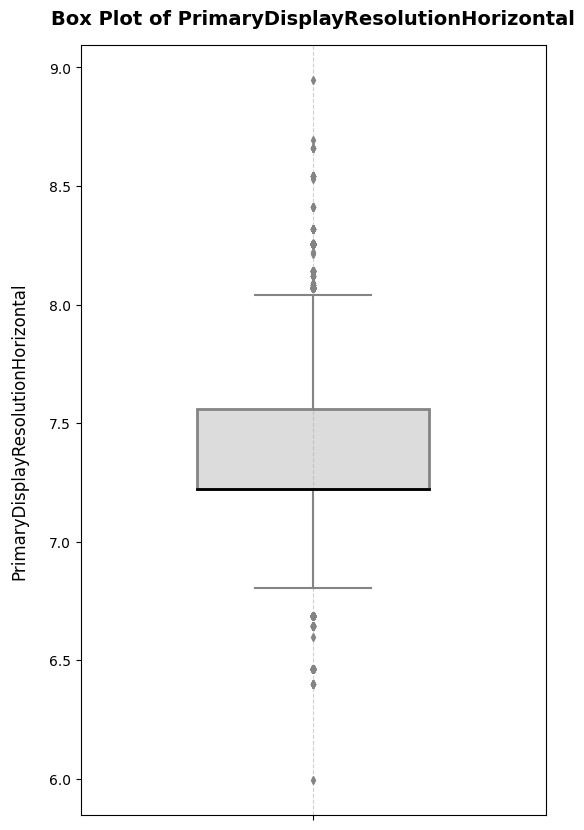

In [76]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['PrimaryDisplayResolutionHorizontal'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('PrimaryDisplayResolutionHorizontal', labelpad=15, fontsize=12)
plt.title('Box Plot of PrimaryDisplayResolutionHorizontal', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is around 7.3–7.5.
- Interquartile Range (IQR): The middle 50% of data lies between approximately 7.1 and 7.8.
- Presence of Outliers: Several outliers are visible on both ends, especially in the upper range.
---

## PrimaryDisplayResolutionVertical

In [77]:
df['PrimaryDisplayResolutionVertical'].describe()

count    99928.000000
mean       898.253192
std        213.695880
min        300.000000
25%        768.000000
50%        768.000000
75%       1080.000000
max       3840.000000
Name: PrimaryDisplayResolutionVertical, dtype: float64

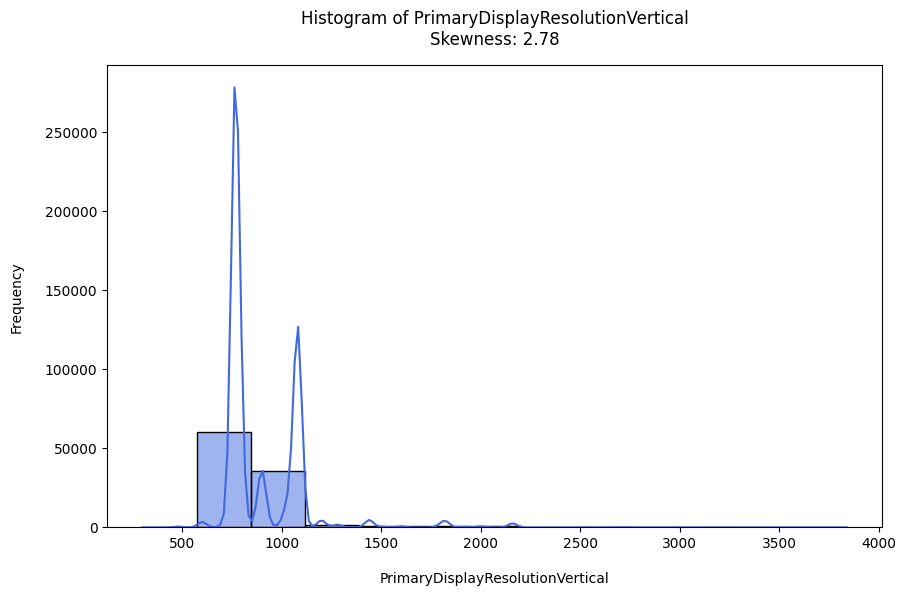

In [78]:
PrimaryDisplayResolutionVertical_skewness = df['PrimaryDisplayResolutionVertical'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayResolutionVertical'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('PrimaryDisplayResolutionVertical', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of PrimaryDisplayResolutionVertical\nSkewness: {PrimaryDisplayResolutionVertical_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [79]:
df['PrimaryDisplayResolutionVertical'] = df['PrimaryDisplayResolutionVertical'].apply(log_transform)

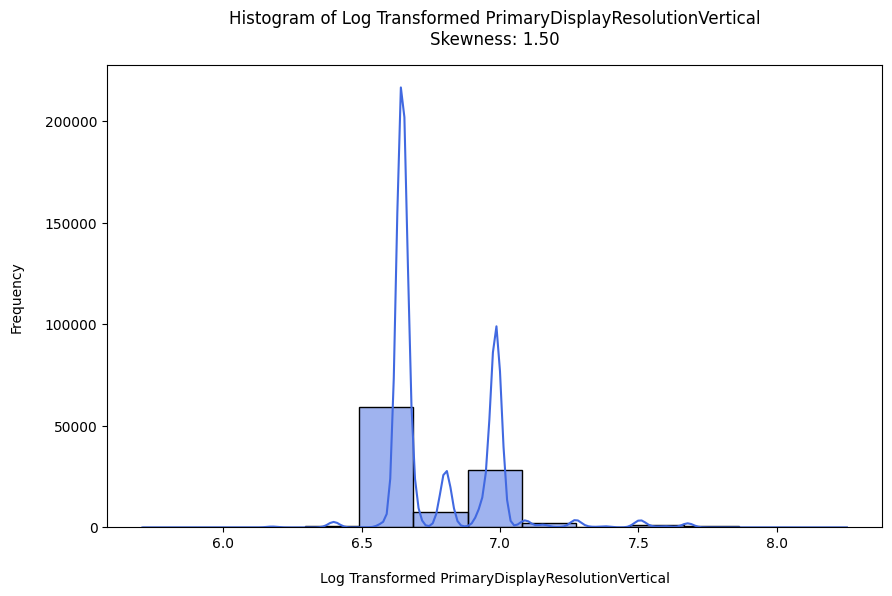

In [80]:
PrimaryDisplayResolutionVertical_skewness = df['PrimaryDisplayResolutionVertical'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['PrimaryDisplayResolutionVertical'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed PrimaryDisplayResolutionVertical', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed PrimaryDisplayResolutionVertical\nSkewness: {PrimaryDisplayResolutionVertical_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: Skewness is 1.39, indicating moderate right skewness.
- Improved Symmetry: The log transformation has helped normalize the distribution, reducing extreme values.
- Peak Concentration: Most values are centered around 2.00–2.10 on the log scale.

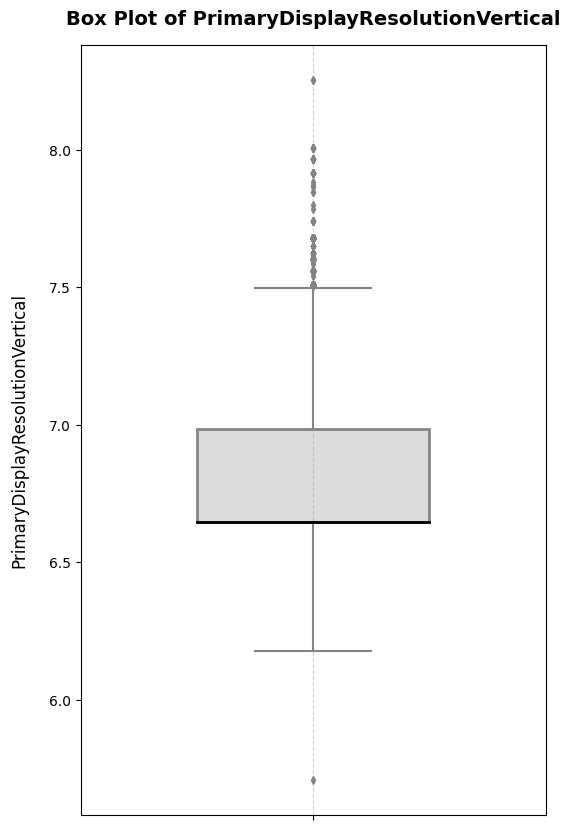

In [81]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['PrimaryDisplayResolutionVertical'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('PrimaryDisplayResolutionVertical', labelpad=15, fontsize=12)
plt.title('Box Plot of PrimaryDisplayResolutionVertical', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is around 2.05.
- Presence of Outliers: Several outliers are visible, especially in the upper range beyond 2.15.
---

[Back to top](#Contents)

## InternalBatteryNumberOfCharges

In [82]:
df['InternalBatteryNumberOfCharges'].describe()

count    9.948500e+04
mean     1.118069e+09
std      1.884682e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.294967e+09
max      4.294967e+09
Name: InternalBatteryNumberOfCharges, dtype: float64

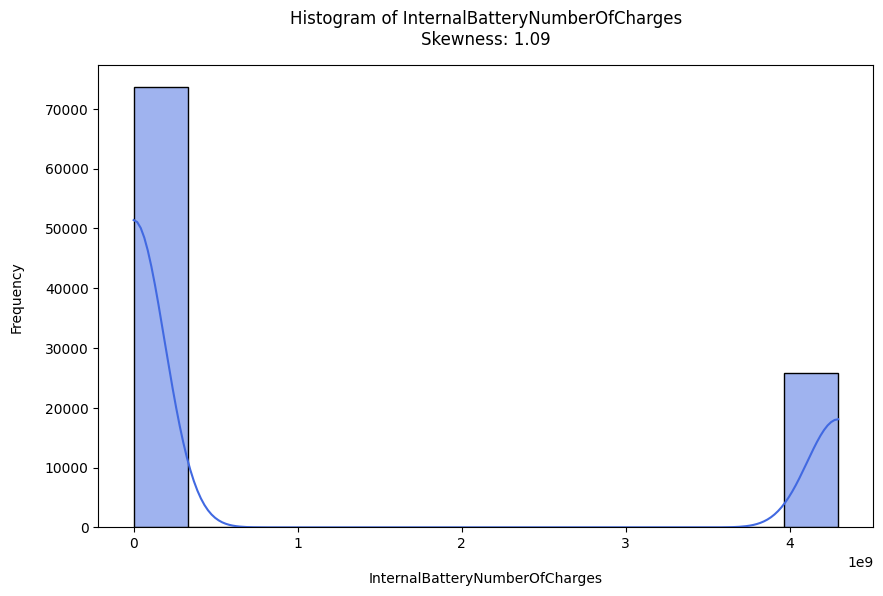

In [83]:
InternalBatteryNumberOfCharges_skewness = df['InternalBatteryNumberOfCharges'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['InternalBatteryNumberOfCharges'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('InternalBatteryNumberOfCharges', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of InternalBatteryNumberOfCharges\nSkewness: {InternalBatteryNumberOfCharges_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [84]:
df['InternalBatteryNumberOfCharges'] = df['InternalBatteryNumberOfCharges'].apply(log_transform)

In [85]:
df['InternalBatteryNumberOfCharges'].describe()

count    99485.000000
mean         6.483048
std          9.482683
min          0.000000
25%          0.000000
50%          0.000000
75%         22.180710
max         22.180710
Name: InternalBatteryNumberOfCharges, dtype: float64

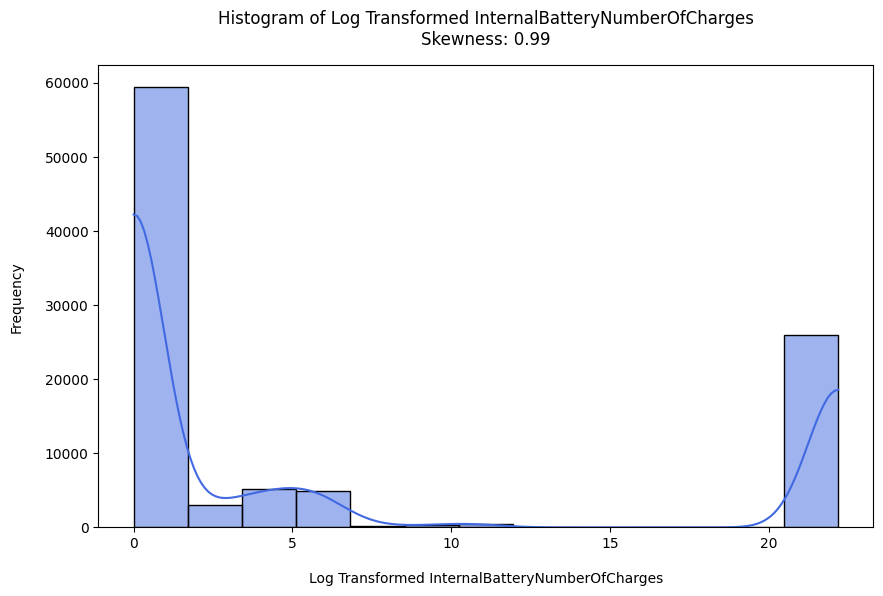

In [86]:
InternalBatteryNumberOfCharges_skewness = df['InternalBatteryNumberOfCharges'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['InternalBatteryNumberOfCharges'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed InternalBatteryNumberOfCharges', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed InternalBatteryNumberOfCharges\nSkewness: {InternalBatteryNumberOfCharges_skewness:.2f}', pad=15)

plt.show()

- Reduced Skewness: Skewness is now 0.99, slightly improving symmetry but still showing mild right skewness.
- Preserved Bimodal Pattern: The two distinct peaks remain even after transformation.


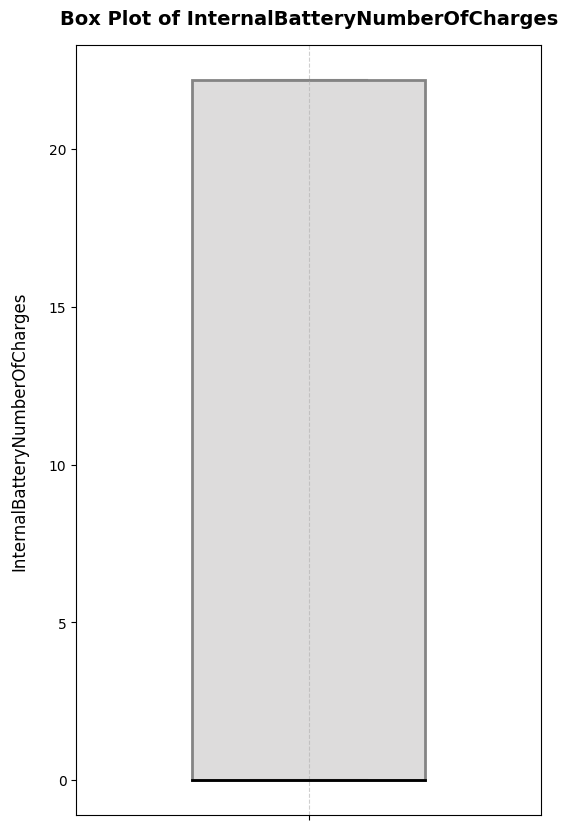

In [87]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['InternalBatteryNumberOfCharges'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('InternalBatteryNumberOfCharges', labelpad=15, fontsize=12)
plt.title('Box Plot of InternalBatteryNumberOfCharges', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Wide Spread: The data spans a large range, from near zero to over 20 (log scale).
- No Visible Outliers: Unlike a typical box plot, there are no separate points outside the whiskers.
- Extreme Range: The interquartile range (IQR) covers a significant portion of the data, showing high variability.
---

## OSBuildRevisionOnly

In [88]:
df['OSBuildRevisionOnly'].describe()

count    100000.000000
mean        986.531360
std        2971.429862
min           0.000000
25%         167.000000
50%         285.000000
75%         547.000000
max       17976.000000
Name: OSBuildRevisionOnly, dtype: float64

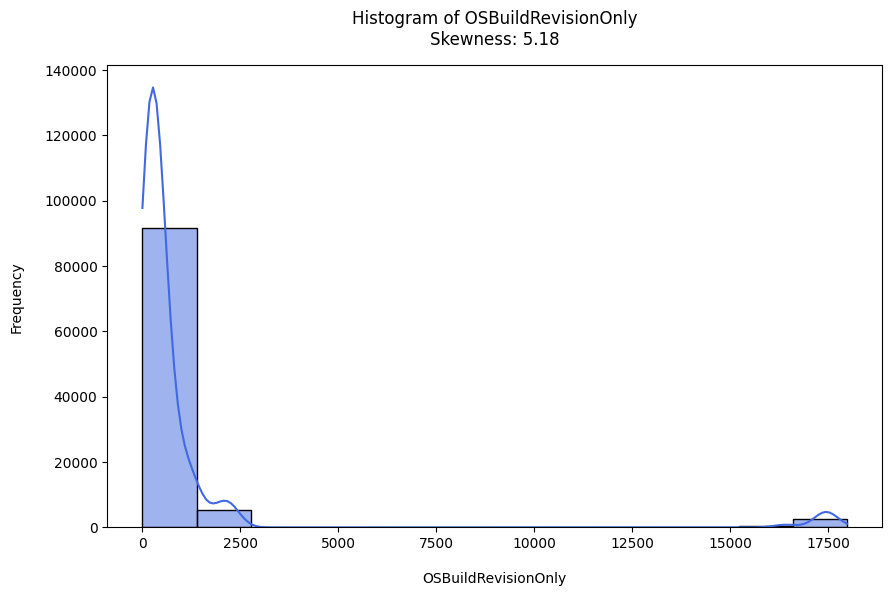

In [89]:
OSBuildRevisionOnly_skewness = df['OSBuildRevisionOnly'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['OSBuildRevisionOnly'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('OSBuildRevisionOnly', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of OSBuildRevisionOnly\nSkewness: {OSBuildRevisionOnly_skewness:.2f}', pad=15)

plt.show()

**Data after Log Transformation**

In [90]:
df['OSBuildRevisionOnly'] = df['OSBuildRevisionOnly'].apply(log_transform)

In [91]:
df['OSBuildRevisionOnly'].describe()

count    100000.000000
mean          5.789028
std           1.334188
min           0.000000
25%           5.123964
50%           5.655992
75%           6.306275
max           9.796848
Name: OSBuildRevisionOnly, dtype: float64

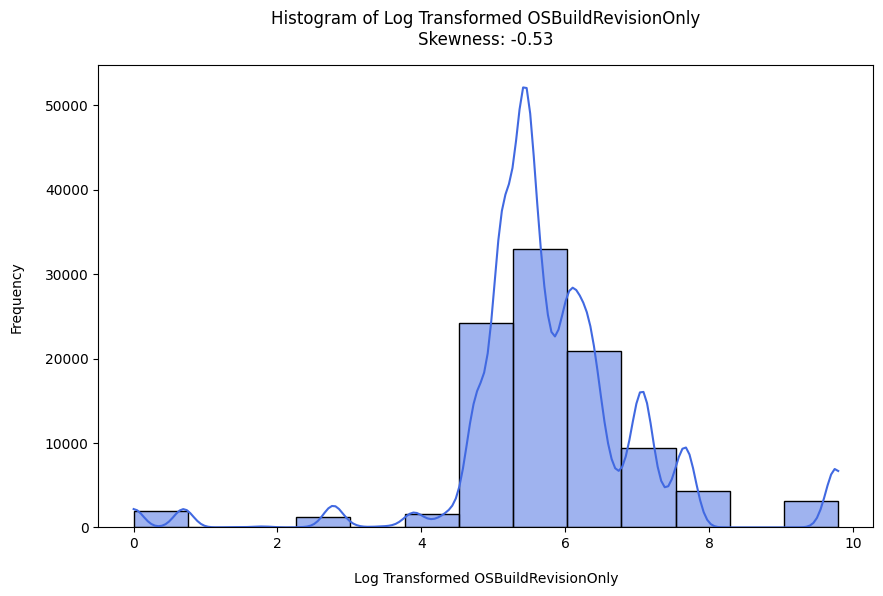

In [92]:
OSBuildRevisionOnly_skewness = df['OSBuildRevisionOnly'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['OSBuildRevisionOnly'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('Log Transformed OSBuildRevisionOnly', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of Log Transformed OSBuildRevisionOnly\nSkewness: {OSBuildRevisionOnly_skewness:.2f}', pad=15)

plt.show()

- Skewness Reduced: Now at -0.53, indicating a near-normal distribution with a slight left skew.
- More Even Distribution: The transformation has spread the values more evenly across bins, improving model performance for algorithms sensitive to normality.
- Multiple Peaks: Suggests possible clusters or distinct groups in the data.

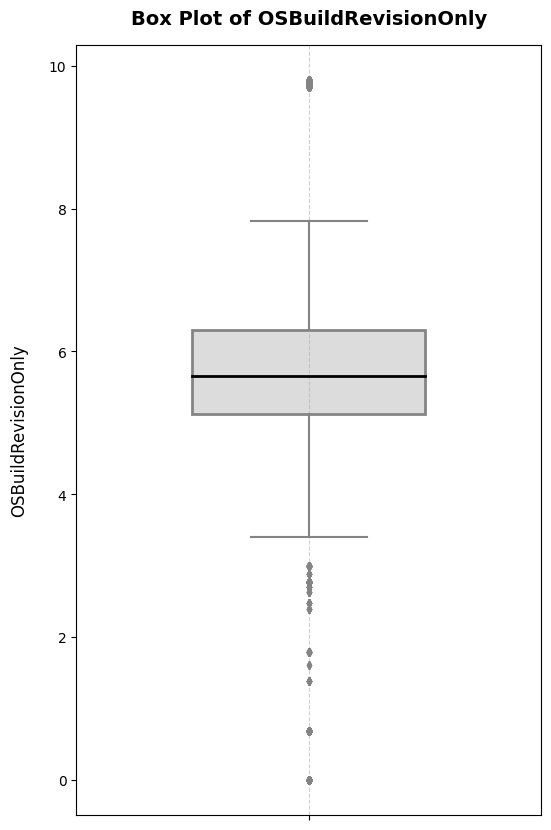

In [93]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['OSBuildRevisionOnly'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('OSBuildRevisionOnly', labelpad=15, fontsize=12)
plt.title('Box Plot of OSBuildRevisionOnly', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is around 5.5 to 6.
- Presence of Outliers: Several outliers are present, mainly in the lower range below 3.
---

## FirmwareManufacturerID

In [94]:
df['FirmwareManufacturerID'].describe()

count    99624.000000
mean       401.987613
std        221.318891
min          2.000000
25%        142.000000
50%        500.000000
75%        556.000000
max       1083.000000
Name: FirmwareManufacturerID, dtype: float64

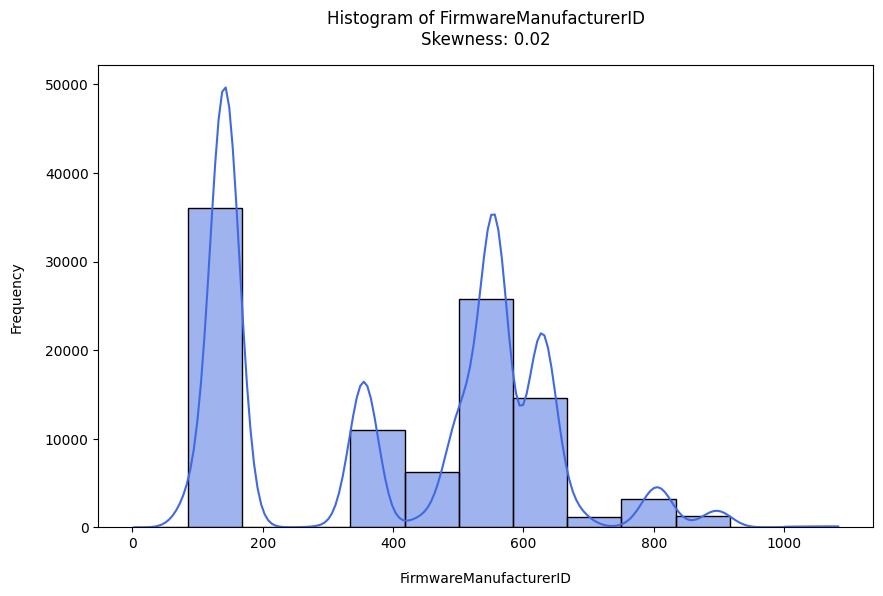

In [95]:
FirmwareManufacturerID_skewness = df['FirmwareManufacturerID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['FirmwareManufacturerID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('FirmwareManufacturerID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of FirmwareManufacturerID\nSkewness: {FirmwareManufacturerID_skewness:.2f}', pad=15)

plt.show()

- Skewness: Near zero (0.02), indicating a fairly symmetrical distribution.
- Multiple Peaks: The distribution has several peaks, suggesting multiple common values.
- Balanced Distribution: No extreme skewness or heavy tails, implying an even spread of values.

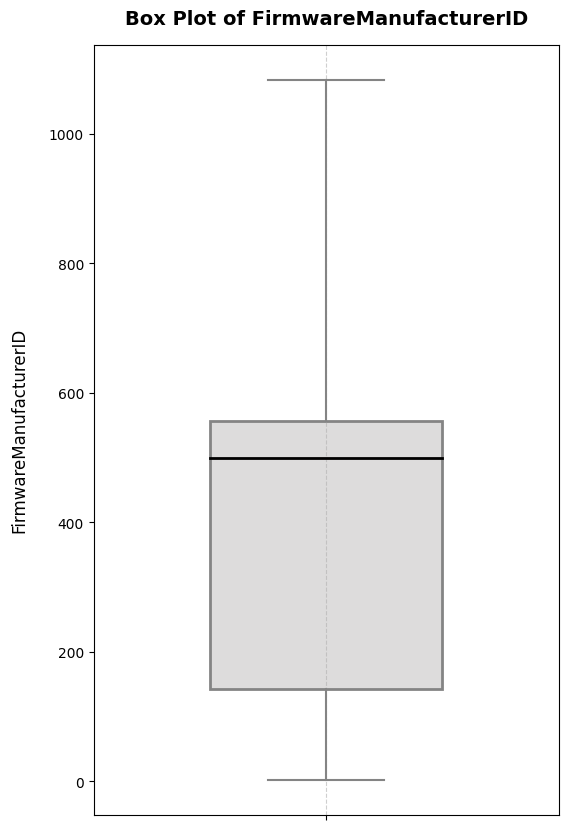

In [96]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['FirmwareManufacturerID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('FirmwareManufacturerID', labelpad=15, fontsize=12)
plt.title('Box Plot of FirmwareManufacturerID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is around 500–550.
- No Outliers: There are no visible outliers in the dataset.
- Data Spread: The values range from near 0 to around 1100, showing a wide spread.
---

## FirmwareVersionID

In [97]:
df['FirmwareVersionID'].describe()

count    99666.000000
mean     32942.648044
std      21151.970827
min        121.000000
25%      13020.000000
50%      33066.000000
75%      52357.000000
max      72091.000000
Name: FirmwareVersionID, dtype: float64

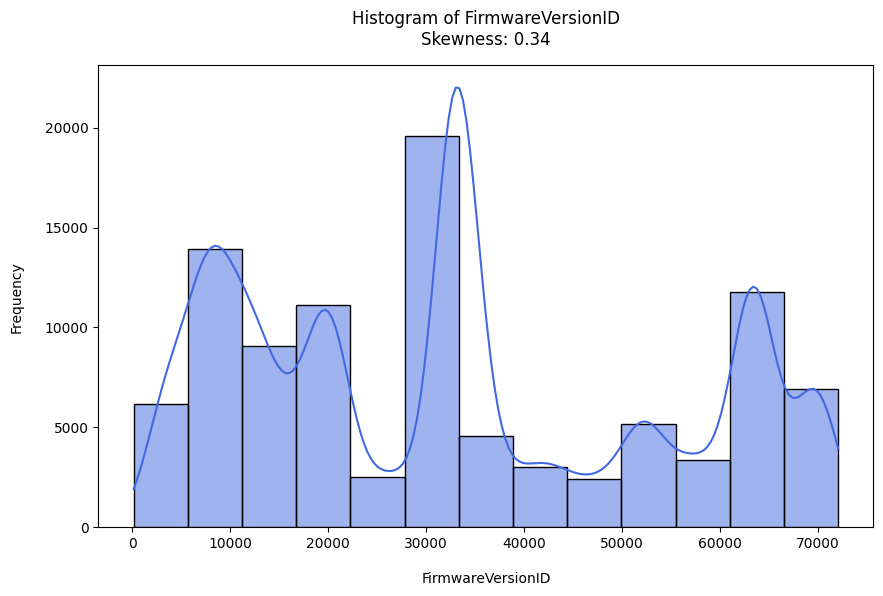

In [98]:
FirmwareVersionID_skewness = df['FirmwareVersionID'].skew()

plt.figure(figsize=(10, 6))
sns.histplot(df['FirmwareVersionID'], bins=13, kde=True, edgecolor='black', color='royalblue')

plt.xlabel('FirmwareVersionID', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Histogram of FirmwareVersionID\nSkewness: {FirmwareVersionID_skewness:.2f}', pad=15)

plt.show()

- Mild Right Skewness: Skewness of 0.34 suggests a slight right tail.
- Multi-modal Distribution: Several peaks indicate multiple common values.

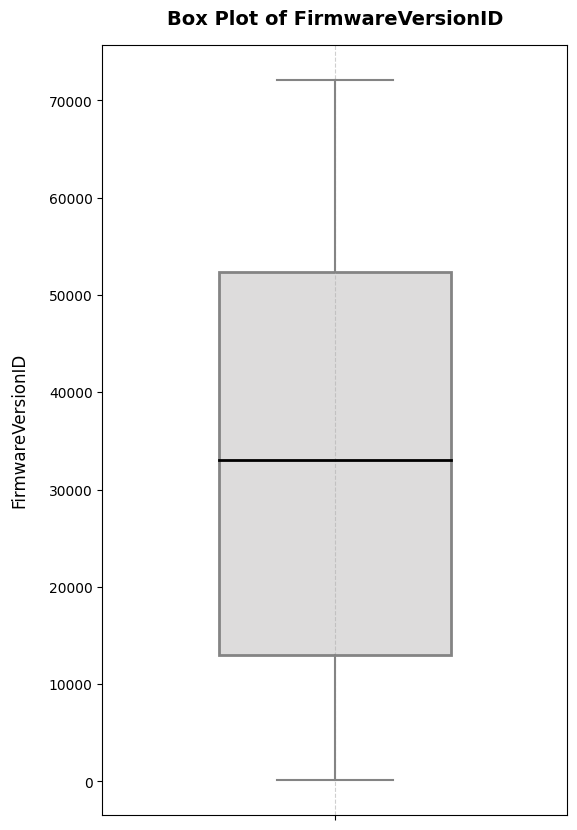

In [99]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['FirmwareVersionID'], palette="coolwarm", width=0.5, fliersize=4, boxprops=dict(linewidth=2), medianprops=dict(color='black', linewidth=2))

plt.ylabel('FirmwareVersionID', labelpad=15, fontsize=12)
plt.title('Box Plot of FirmwareVersionID', pad=15, fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

- Central Tendency: The median is approximately 30,000–35,000, indicated by the thick black line inside the box.
- Interquartile Range (IQR): The middle 50% of data falls roughly between 10,000 and 50,000.
- Outliers: There are no extreme outliers visible in this plot.
---


[Back to top](#Contents)

## Treating Date-time Columns

In [100]:
df['DateOS'] = pd.to_datetime(df['DateOS'])
df['DateAS'] = pd.to_datetime(df['DateAS'])

test_df['DateOS'] = pd.to_datetime(test_df['DateOS'])
test_df['DateAS'] = pd.to_datetime(test_df['DateAS'])

In [101]:
df['YearAS'] = df['DateAS'].dt.year
df['MonthAS'] = df['DateAS'].dt.month
df['WeekdayAS'] = df['DateAS'].dt.weekday

test_df['YearAS'] = test_df['DateAS'].dt.year
test_df['MonthAS'] = test_df['DateAS'].dt.month
test_df['WeekdayAS'] = test_df['DateAS'].dt.weekday

In [102]:
df['YearOS'] = df['DateOS'].dt.year
df['MonthOS'] = df['DateOS'].dt.month
df['WeekdayOS'] = df['DateOS'].dt.weekday

test_df['YearOS'] = test_df['DateOS'].dt.year
test_df['MonthOS'] = test_df['DateOS'].dt.month
test_df['WeekdayOS'] = test_df['DateOS'].dt.weekday

In [103]:
df['YearOS'].value_counts()

YearOS
2018.0    81356
2017.0    15219
2016.0     2771
2015.0      630
Name: count, dtype: int64

## YearAs

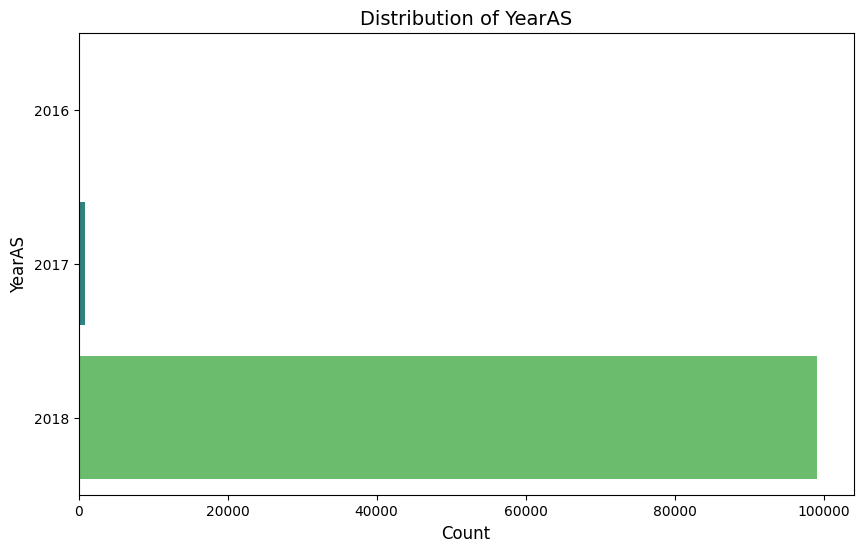

In [104]:
YearAs_counts = df['YearAS'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=YearAs_counts.values, y=YearAs_counts.index, palette="viridis", orient="h")

plt.xlabel("Count", fontsize=12)
plt.ylabel("YearAS", fontsize=12)
plt.title("Distribution of YearAS", fontsize=14)

plt.show()

- The majority of malware signatures belong to the year 2018
- Increased cyber threats and malware variants in 2018 led to more frequent signature updates.
---

## YearOS

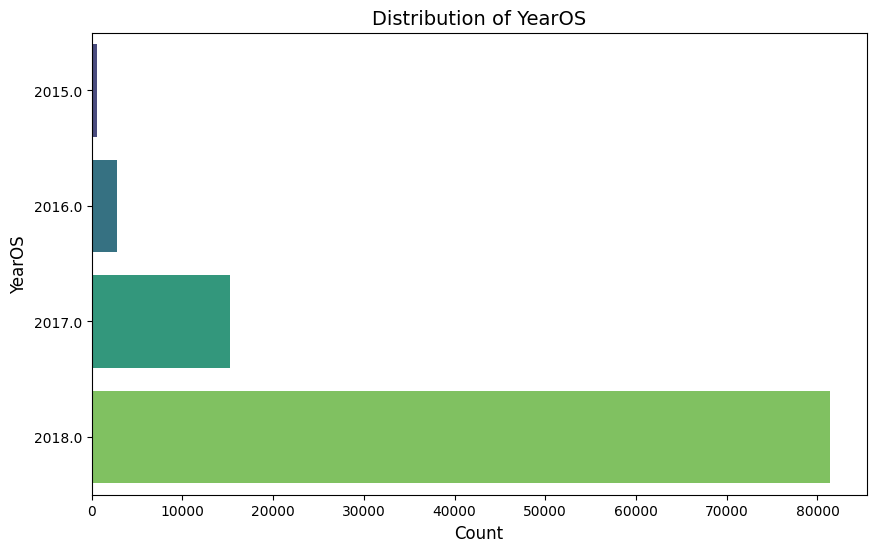

In [105]:
YearOs_counts = df['YearOS'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=YearOs_counts.values, y=YearOs_counts.index, palette="viridis", orient="h")

plt.xlabel("Count", fontsize=12)
plt.ylabel("YearOS", fontsize=12)
plt.title("Distribution of YearOS", fontsize=14)

plt.show()

- Fewer devices had their last update in 2017 or earlier, showing that many systems remained outdated.
---

[Back to top](#Contents)

## Dropping Redundant Columns :


- **MachineID** - contains a wide range of unique values

In [106]:
df.drop('MachineID', axis=1, inplace=True)
test_df.drop('MachineID', axis=1, inplace=True)

- **SignatureVersion** - contains a wide range of unique values, each contributing minimally to the overall distribution.

In [107]:
df.drop('SignatureVersion', axis=1, inplace=True)
test_df.drop('SignatureVersion', axis=1, inplace=True)

- **IsBetaUser, AutoSampleSubmissionEnabled & IsFlightsDisabled** - Contains a single unique value, making it irrelevant for predictive modeling.

In [108]:
df.drop('IsBetaUser', axis=1, inplace=True)
df.drop('AutoSampleSubmissionEnabled', axis=1, inplace=True)
df.drop('IsFlightsDisabled', axis=1, inplace=True)

test_df.drop('IsBetaUser', axis=1, inplace=True)
test_df.drop('AutoSampleSubmissionEnabled', axis=1, inplace=True)
test_df.drop('IsFlightsDisabled', axis=1, inplace=True)

- **DateAS & dateOS -** Extracted their features to Year, Month and Weekdays

In [109]:
df.drop('DateAS', axis=1, inplace=True)
df.drop('DateOS', axis=1, inplace=True)

test_df.drop('DateAS', axis=1, inplace=True)
test_df.drop('DateOS', axis=1, inplace=True)

[Back to top](#Contents)

# **Preprocessing**

## Handling Unknown Values

In [110]:
df.isin(['Unknown', 'UNKNOWN']).sum()

ProductName                               0
EngineVersion                             0
AppVersion                                0
RealTimeProtectionState                   0
IsPassiveModeEnabled                      0
AntivirusConfigID                         0
NumAntivirusProductsInstalled             0
NumAntivirusProductsEnabled               0
HasTpm                                    0
CountryID                                 0
CityID                                    0
GeoRegionID                               0
LocaleEnglishNameID                       0
PlatformType                              0
Processor                                 0
OSVersion                                 0
OSBuildNumber                             0
OSProductSuite                            0
OsPlatformSubRelease                      0
OSBuildLab                                0
SKUEditionName                            0
IsSystemProtected                         0
SMode                           

**Changing values as Unknown to NaN**

In [111]:
df.replace(['Unknown', 'UNKNOWN'], np.nan, inplace=True)

**Total missing values in each columns**

In [112]:
df.isna().sum()

ProductName                               0
EngineVersion                             0
AppVersion                                0
RealTimeProtectionState                  66
IsPassiveModeEnabled                      0
AntivirusConfigID                        76
NumAntivirusProductsInstalled            76
NumAntivirusProductsEnabled              76
HasTpm                                    0
CountryID                                 0
CityID                                  623
GeoRegionID                               0
LocaleEnglishNameID                       0
PlatformType                              0
Processor                                 0
OSVersion                                 0
OSBuildNumber                             0
OSProductSuite                            0
OsPlatformSubRelease                      0
OSBuildLab                                0
SKUEditionName                            0
IsSystemProtected                        76
SMode                           

---
## **Data Split**

In [113]:
X = df.drop('target', axis=1)
y = df['target']

**Train-Test Split**

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape

(80000, 74)

## **Pipeline**

Numerical Columns

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [117]:
num_col = []

for col in X.columns:
  if X[col].dtype in ['int', 'float'] and X[col].nunique()>100:
    num_col.append(col)



Seperating Numerical Columns with High Outliers

In [138]:
high_outliers = []
low_outliers = []

for col in num_col:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_outliers = (X[col] < (Q1 - 1.5 * IQR)).sum()
    higher_outliers = (X[col] > (Q3 + 1.5 * IQR)).sum()

    if higher_outliers > lower_outliers:
        high_outliers.append(col)
    else :
        low_outliers.append(col)

print(len(high_outliers))
print(len(low_outliers))

5
14


Pipeline with SimpleImputer and StandardScaler method

In [119]:
num_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', dStandardScaler())
])
num_pipeline1

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

Pipeline with SimpleImputer and RobustScaler method

In [120]:
num_pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])
num_pipeline2

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', RobustScaler())])

Categorical Columns

In [121]:
cat_col = []

for col in X.columns:
   if X[col].dtype not in ['int64', 'float64'] or X[col].nunique() <= 100:
            cat_col.append(col)



Pipeline with SimpleImputer(most_frequent) and OneHotEncoder method

In [122]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

Combining the Pipelines with ColumnTransformer

In [123]:
preprocessor = ColumnTransformer([
    ('num_column1', num_pipeline1, low_outliers),
    ('num_column2', num_pipeline2, high_outliers),
    ('cat_column', cat_pipeline, cat_col)
])
preprocessor

ColumnTransformer(transformers=[('num_column1',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['AntivirusConfigID', 'CountryID', 'CityID',
                                  'GeoRegionID', 'LocaleEnglishNameID',
                                  'IEVersionID', 'OEMModelID',
                                  'ProcessorModelID', 'PrimaryDiskCapacityMB',
                                  'SystemVolumeCapacityMB',
                                  'InternalBatteryNumberOfCharges',
                                  'OSBuildRevisionOnly',
                                  '...
                                  'PlatformType', 'Processor', 'OSVersion',
                                  'OSBuildNumber', 'OSProductSuite',
                                  'OsPlatformSubRelease', 'OSBuildLab',
                                  'SKUEditionName', 'IsSystemProtected',
                                  'SMode', 'FirewallEnabled', 'EnableLUA',
                                  'MDC2FormFactor', 'DeviceFamily',
                                  'ProcessorCoreCount',
                                  'ProcessorManufacturerID', 'PrimaryDiskType',
                                  'HasOpticalDiskDrive', 'ChassisType',
                                  'PowerPlatformRole', 'NumericOSVersion',
                                  'OSArchitecture', ...])])

Fitting on Training data

In [124]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('num_column1',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['AntivirusConfigID', 'CountryID', 'CityID',
                                  'GeoRegionID', 'LocaleEnglishNameID',
                                  'IEVersionID', 'OEMModelID',
                                  'ProcessorModelID', 'PrimaryDiskCapacityMB',
                                  'SystemVolumeCapacityMB',
                                  'InternalBatteryNumberOfCharges',
                                  'OSBuildRevisionOnly',
                                  '...
                                  'PlatformType', 'Processor', 'OSVersion',
                                  'OSBuildNumber', 'OSProductSuite',
                                  'OsPlatformSubRelease', 'OSBuildLab',
                                  'SKUEditionName', 'IsSystemProtected',
                                  'SMode', 'FirewallEnabled', 'EnableLUA',
                                  'MDC2FormFactor', 'DeviceFamily',
                                  'ProcessorCoreCount',
                                  'ProcessorManufacturerID', 'PrimaryDiskType',
                                  'HasOpticalDiskDrive', 'ChassisType',
                                  'PowerPlatformRole', 'NumericOSVersion',
                                  'OSArchitecture', ...])])

Applying Transformation

In [125]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

test_df_processed = preprocessor.transform(test_df)

In [141]:
X_train_processed.shape

(80000, 1055)

# **Feature Engineering**

Performing SelectKBest feature selection for keeping the most relevant columns

In [126]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

warnings.filterwarnings("ignore", category=UserWarning)

feature_sel1 = SelectKBest(score_func=mutual_info_classif, k=1000)

In [127]:
X_train_Skb = feature_sel1.fit_transform(X_train_processed, y_train)
X_test_Skb = feature_sel1.transform(X_test_processed)

test_df_Skb = feature_sel1.transform(test_df_processed)

# Models

In [128]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=15,
                                  class_weight='balanced')
rf_model.fit(X_train_Skb, y_train)

y_val_pred = rf_model.predict(X_test_Skb)
accuracy = accuracy_score(y_test, y_val_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6195


In [129]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_Skb, y_train)

y_val_pred = log_model.predict(X_test_Skb)
accuracy = accuracy_score(y_test, y_val_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.6162


In [130]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
dt_model.fit(X_train_Skb, y_train)

y_val_pred = dt_model.predict(X_test_Skb)
accuracy = accuracy_score(y_test, y_val_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.6036


In [131]:
#XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=6, scale_pos_weight=1, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_Skb, y_train)

y_val_pred = xgb_model.predict(X_test_Skb)
accuracy = accuracy_score(y_test, y_val_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.6250


In [132]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train_Skb, y_train)

y_val_pred = lgbm.predict(X_test_Skb)

accuracy = accuracy_score(y_test, y_val_pred)
print(f"LightGBM Accuracy: {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4615
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 627
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
LightGBM Accuracy: 0.6272


## Hyperparameter Tuning

In [133]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': randint(100, 1000),
#     'max_depth': randint(3, 15),
#     'learning_rate': uniform(0.01, 0.2),
#     'num_leaves': randint(20, 50),
#     'feature_fraction': uniform(0.5, 0.5),
# }

# lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)

# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_grid,
#     n_iter=20,
#     scoring='accuracy',
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(X_train_Skb, y_train)

# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

In [134]:
#LGBMClassifier model

best_lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

best_lgbm.fit(X_train_Skb, y_train)

y_val_pred = best_lgbm.predict(X_test_Skb)

accuracy1 = accuracy_score(y_test, y_val_pred)
print(f"Optimized LightGBM Accuracy: {accuracy1:.4f}")



Optimized LightGBM Accuracy: 0.6288


**Classification Report**

In [135]:
from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_val_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.67      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



**Submission**

In [136]:
final_test_pred = best_lgbm.predict(test_df_Skb)

submission = pd.DataFrame({'id': test_df.index, 'target': final_test_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created!")

Submission file created!
